<center><h1>COSC 3337 Data Science I Final Project</h1></center>
<center><h2>Heart Disease Prediction (Classification)</h2></center>

Link to Kaggle dataset: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?resource=download.


Variables:
* HeartDisease (Target Variable): Yes/No, respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
* BMI: Body Mass Index
* Smoking: Have you smoked at least 100 cigarettes in your entire life?
* AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)
* Stroke: Have you ever had a stroke?
* PhysicalHealth: How many days in the past month has your physical health not been good?
* MentalHealth: How many days in the past month has your mental health not been good?
* DiffWalking: Do you have difficulty walking/climbing stairs?
* AgeCategory:  14 age ranges beginning with 18 years olds.
* Sex: Male/Female
* Race: White/Hispanic/Asian/Black/Other
* Diabetic: Do you have diabetes?
* PhysicalActivity: Have you had any physical activity in the past month?
* GenHealth: Are you healthy in general?
* SleepTime: How many hours of sleep do you have in a day?
* Asthma: Have you ever had asthma?
* KidneyDisease: Did/Do you have kidney disease?
* SkinCancer: Did/Do you have skin cancer?

Research Questions:
* What kind of patterns can we find from analyzing this data?
* Can we identify variables that are stand-out key factors to heart disease?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

#initialize figure
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

## Data Exploration

In [2]:
theheart = pd.read_csv('heart_2020_cleaned.csv')
theheart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
theheart.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [4]:
theheart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
unique = theheart.nunique(axis=0)
print("Number of unique values in each column:\n", unique)

Number of unique values in each column:
 HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64


In [6]:
print(theheart['HeartDisease'])

0          No
1          No
2          No
3          No
4          No
         ... 
319790    Yes
319791     No
319792     No
319793     No
319794     No
Name: HeartDisease, Length: 319795, dtype: object


In [7]:
theheart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [8]:
theheart.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


## Data Processing

#### Converting Y/N columns to Binary values

In [9]:
yes_no_cols = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

In [10]:
theheart_copy = theheart.copy()

for x in yes_no_cols:
    theheart_copy[x].replace({'Yes': 1,'No': 0}, inplace=True)
    
theheart_copy.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0


#### Every Y/N column that we had noted earlier should have only two unique values:

In [11]:
unique = theheart_copy.nunique(axis=0)
print("Number of unique values in each column:\n", unique)

Number of unique values in each column:
 HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64


#### Notice that 'Diabetic' contains four unique variables, let's see what's going on there:

In [12]:
theheart_copy.Diabetic.unique()

array([1, 0, 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

#### We will just convert the unnecessarily specific values to just 1 and 0

In [13]:
theheart_copy['Diabetic'] = theheart_copy['Diabetic'].map({1:1, 0:0, 'No, borderline diabetes': 0, 'Yes (during pregnancy)': 1})
theheart_copy.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0


In [14]:
theheart_copy.Diabetic.unique()

array([1, 0], dtype=int64)

#### We will encode the ordinal categorical variables using Label Encoder

In [15]:
from sklearn.preprocessing import LabelEncoder

categoricals = ['GenHealth','AgeCategory']
theheart_copy[categoricals] = theheart_copy[categoricals].apply(LabelEncoder().fit_transform)

theheart_copy.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,7,White,1,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,12,White,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,9,White,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,11,White,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,4,White,0,1,4,8.0,0,0,0


#### We will encode the nominal categorical variables using One-Hot Encoding

In [16]:
theheart_copy = pd.get_dummies(data=theheart_copy, columns=['Sex','Race'])

#### Let's check a heatmap of our columns to identify potential multicollinearity 

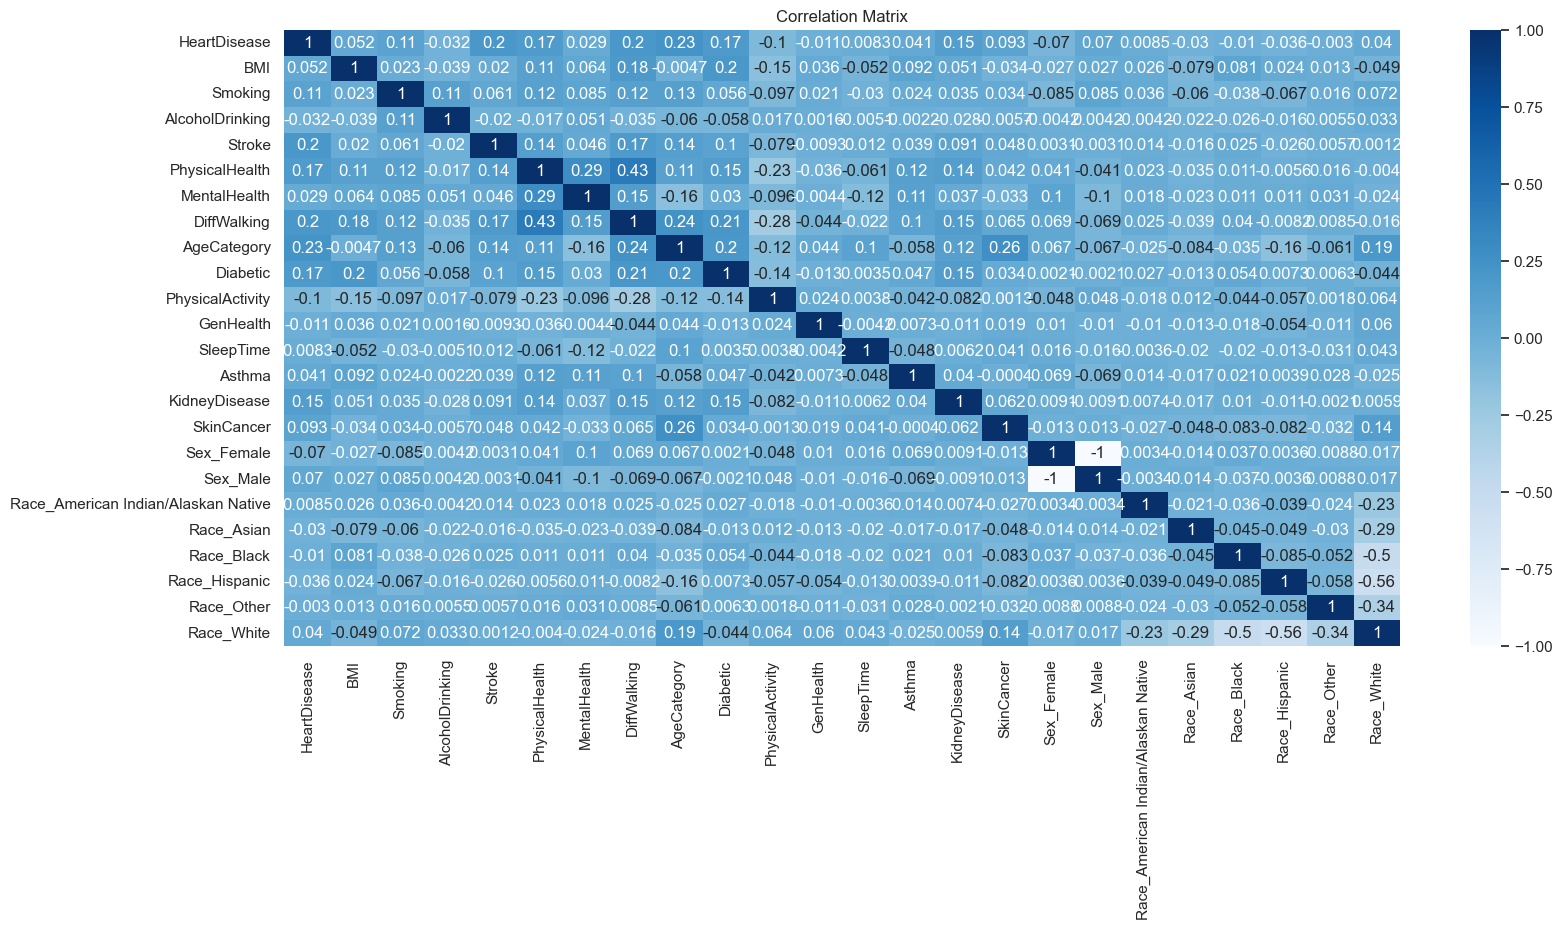

In [17]:
sns.set (rc = {'figure.figsize':(18, 8)})
sns.heatmap(theheart_copy.corr(), annot=True, cmap="Blues")
plt.title('Correlation Matrix')
plt.show()

#### There does not appear to be any sign of multicollinearity. Now, let's take a look at correlation of each feature versus the target HeartDisease

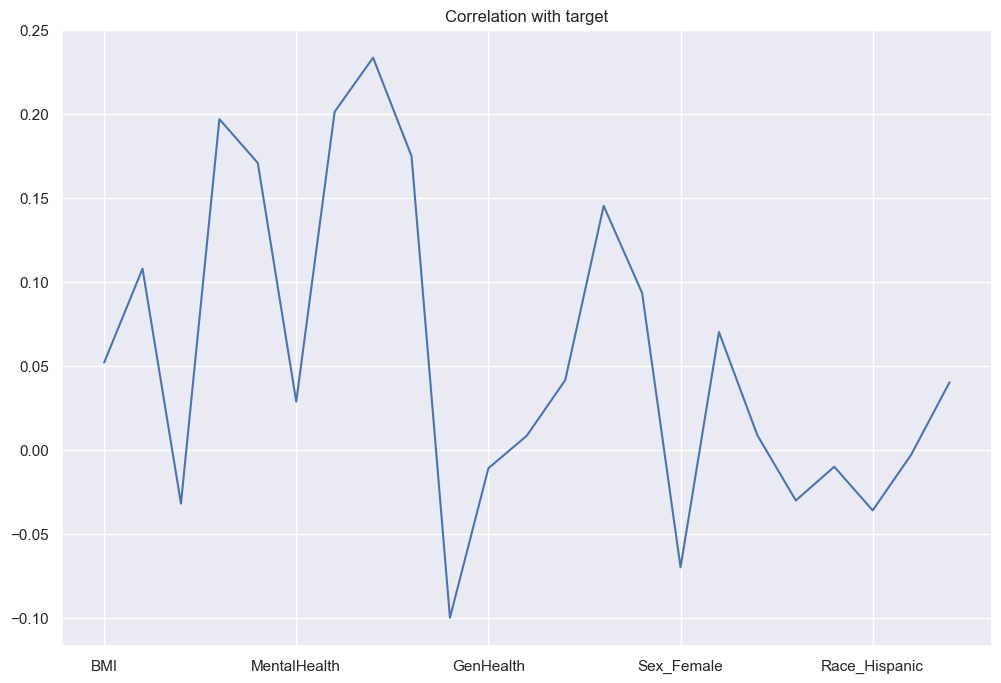

In [18]:
theheart_copy.drop('HeartDisease', axis=1).corrwith(theheart_copy.HeartDisease).plot(kind='line', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")
plt.show()

#### We are looking for features with a correlation to the target close to 0 because they do not have a useful relationship to the target:

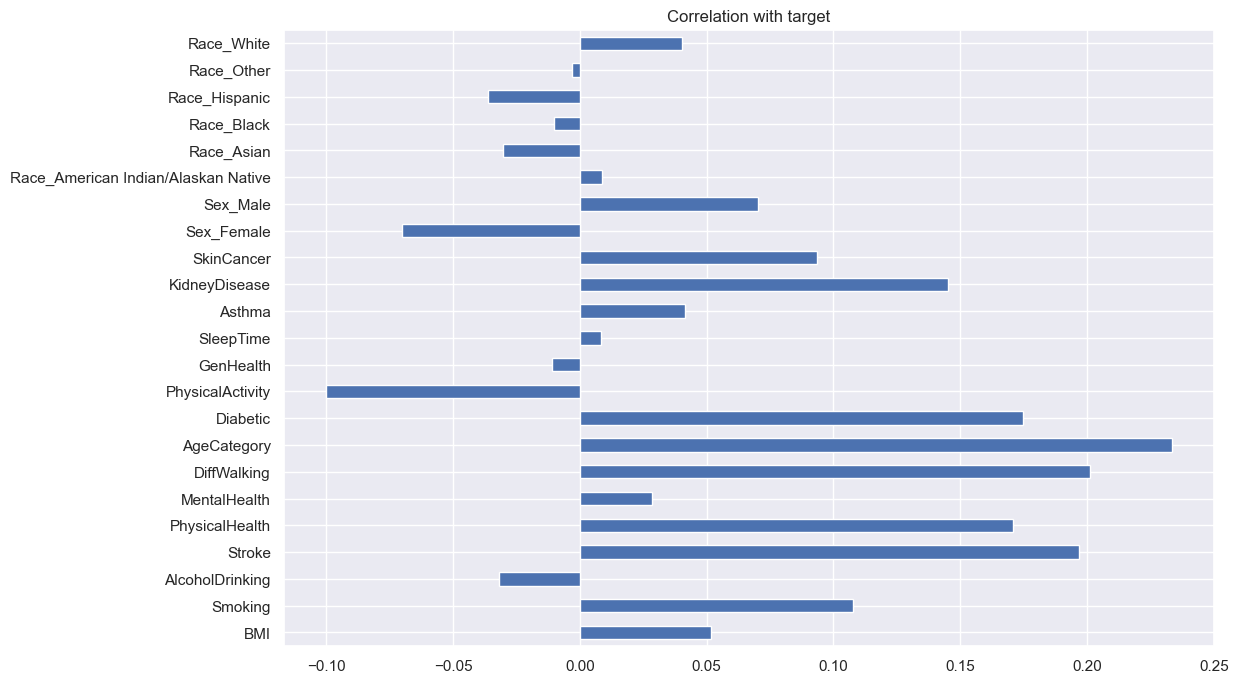

In [19]:
theheart_copy.drop('HeartDisease', axis=1).corrwith(theheart_copy.HeartDisease).plot(kind='barh', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")
plt.show()

#### SleepTime, GenHealth, Race, MentalHealth, AlcoholDrinking, Asthma and Race all have low correlation with the target variable, so we will drop those columns:

In [20]:
theheart_copy.drop(['SleepTime', 'GenHealth', 'MentalHealth', 'AlcoholDrinking', 'Asthma', 'Race_White','Race_Other','Race_Hispanic','Race_Black','Race_Asian','Race_American Indian/Alaskan Native'], axis="columns", inplace=True)

In [21]:
theheart_copy.head()

,HeartDisease,BMI,Smoking,Stroke,PhysicalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,KidneyDisease,SkinCancer,Sex_Female,Sex_Male
0,0,16.60,1,0,3.0,0,7,1,1,0,1,1,0
1,0,20.34,0,1,0.0,0,12,0,1,0,0,1,0
2,0,26.58,1,0,20.0,0,9,1,1,0,0,0,1
3,0,24.21,0,0,0.0,0,11,0,0,0,1,1,0
4,0,23.71,0,0,28.0,1,4,0,1,0,0,1,0


#### Now we have only columns that have stronger relationships with the target.

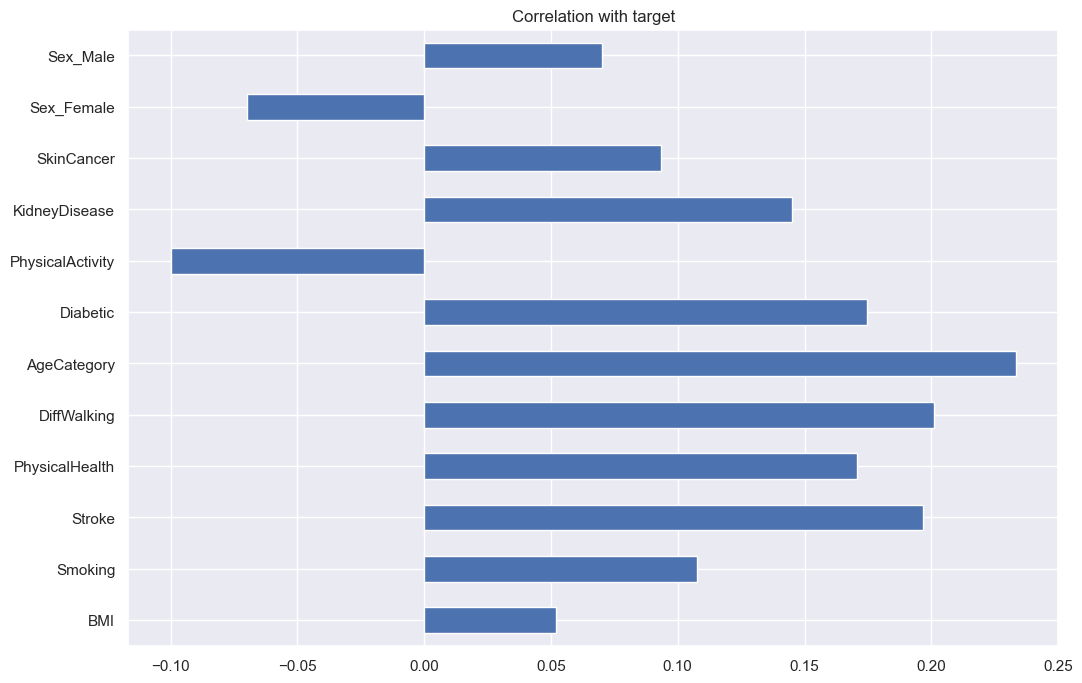

In [22]:
theheart_copy.drop('HeartDisease', axis=1).corrwith(theheart_copy.HeartDisease).plot(kind='barh', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")
plt.show()

#### Let's take another look at the correlation matrix now

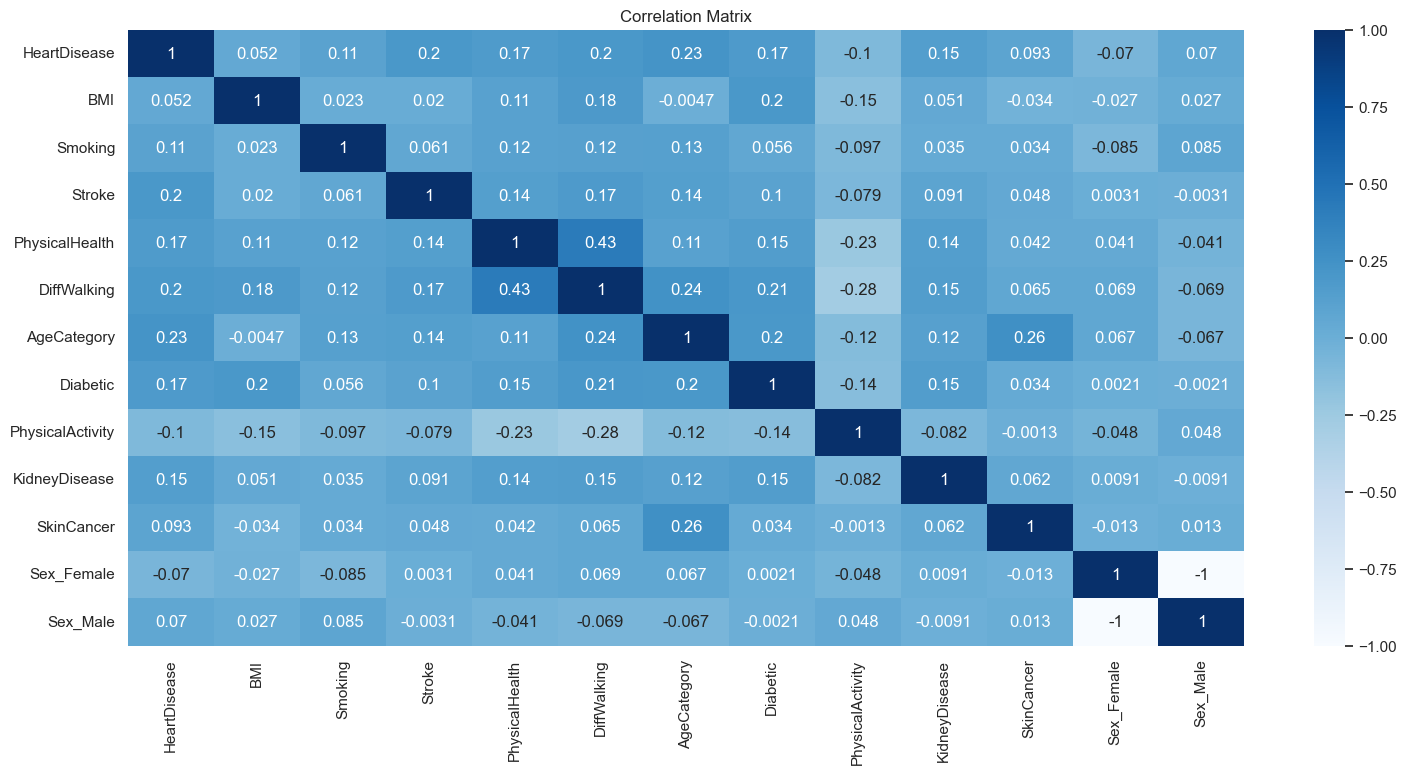

In [23]:
sns.set (rc = {'figure.figsize':(18, 8)})
sns.heatmap(theheart_copy.corr(), annot=True, cmap="Blues")
plt.title('Correlation Matrix')
plt.show()

#### Checking for duplicates

In [24]:
#theheart_copy.shape

In [25]:
#theheart_copy.duplicated().sum()

#### Let's go ahead and drop them

In [26]:
#theheart_copy.drop_duplicates(inplace=True)
#theheart_copy.shape

## Data Visualization

#### Let's take closer look at our target variable, HeartDisease

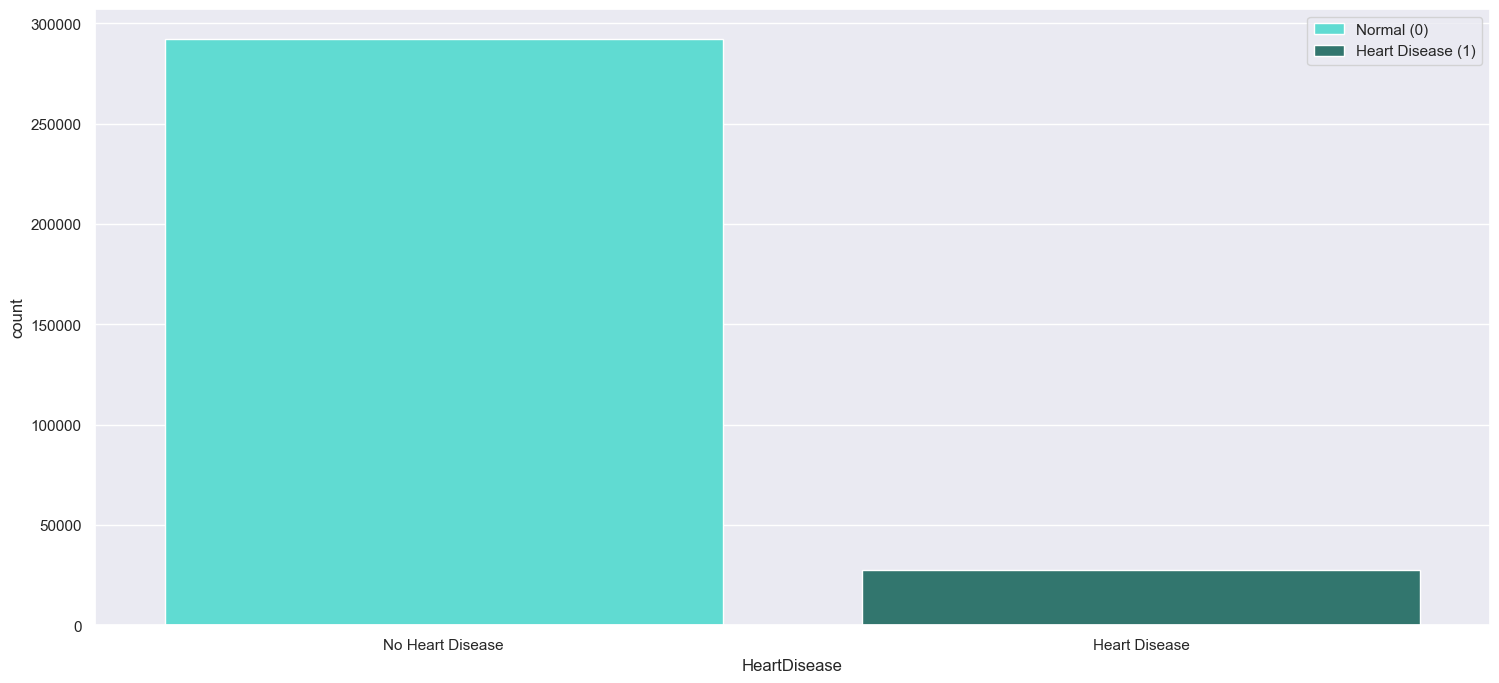

In [27]:
sns.countplot(data=theheart_copy, x="HeartDisease", hue="HeartDisease", palette=("#4CEFE3","#268277"), dodge=False)
plt.xticks(ticks= np.arange(0,2), labels= ["No Heart Disease", "Heart Disease"], rotation=0)
plt.legend(labels=["Normal (0)","Heart Disease (1)"])
plt.show()

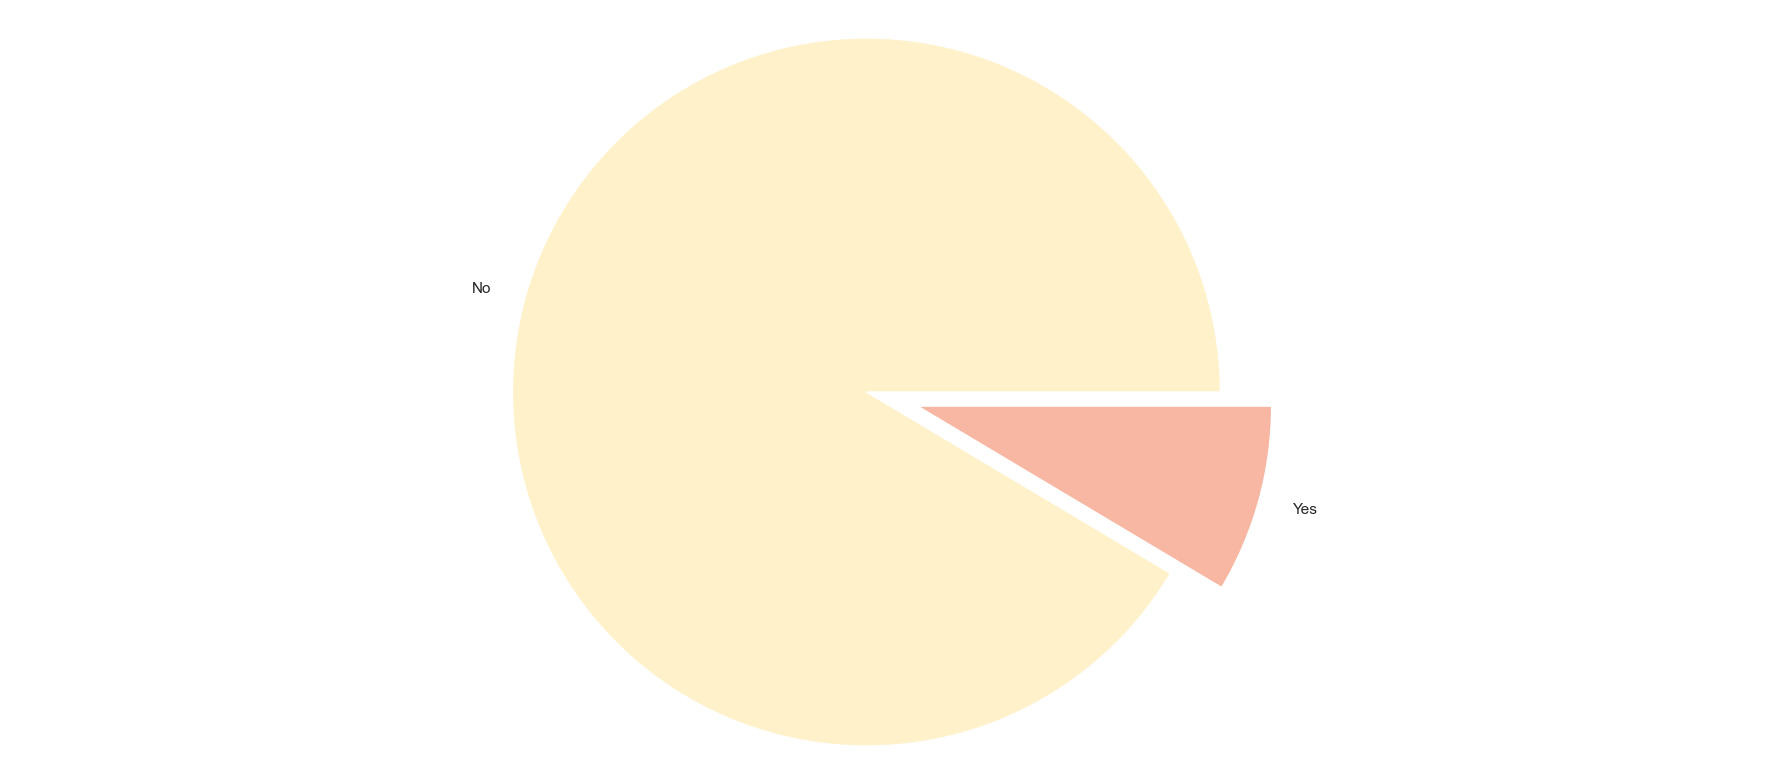

In [28]:
plt.pie(theheart_copy['HeartDisease'].value_counts(), labels=['No','Yes'], colors=['#FFF1C9','#F7B7A3'], explode=[0,0.15])
plt.axis('equal')
plt.tight_layout()
plt.show()

#### How many men and women are there?

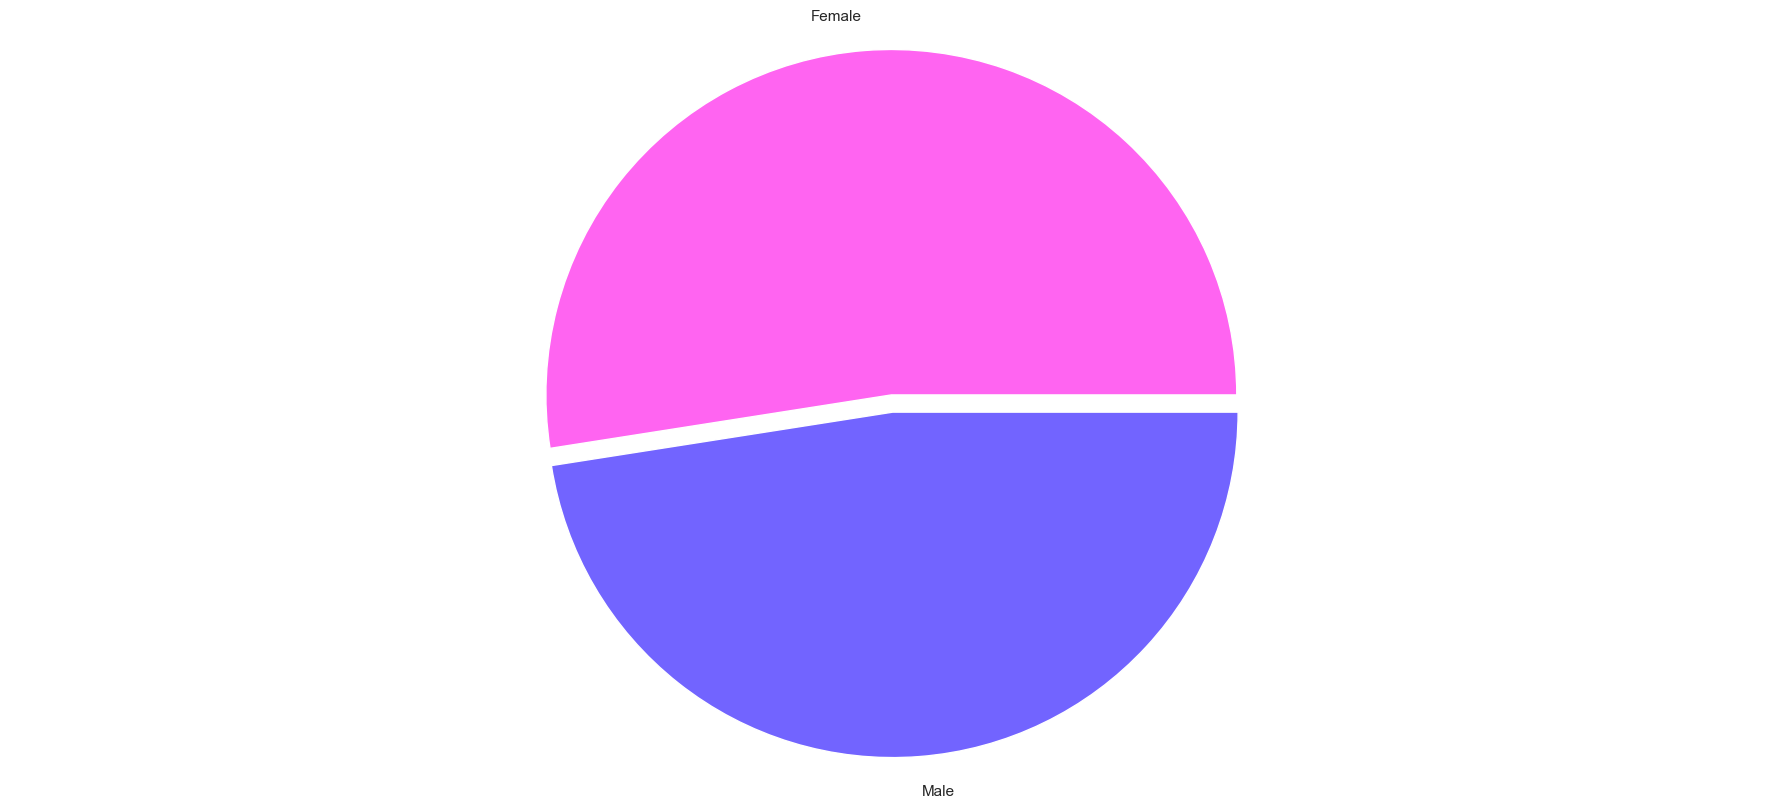

In [29]:
plt.pie(theheart['Sex'].value_counts(), labels=['Female','Male'], colors=['#FF64F1','#7264FF'], explode=[0,0.05])
plt.axis('equal')
plt.tight_layout()
plt.show()

In [30]:
theheart['Sex'].value_counts()

Female    167805
Male      151990
Name: Sex, dtype: int64

#### Samples without heart disease versus with heart disease is very imbalanced, so we will rebalance this before we make our model

In [31]:
print(theheart_copy['HeartDisease'].value_counts())

0    292422
1     27373
Name: HeartDisease, dtype: int64


#### Let's check for outliers in our numerical data

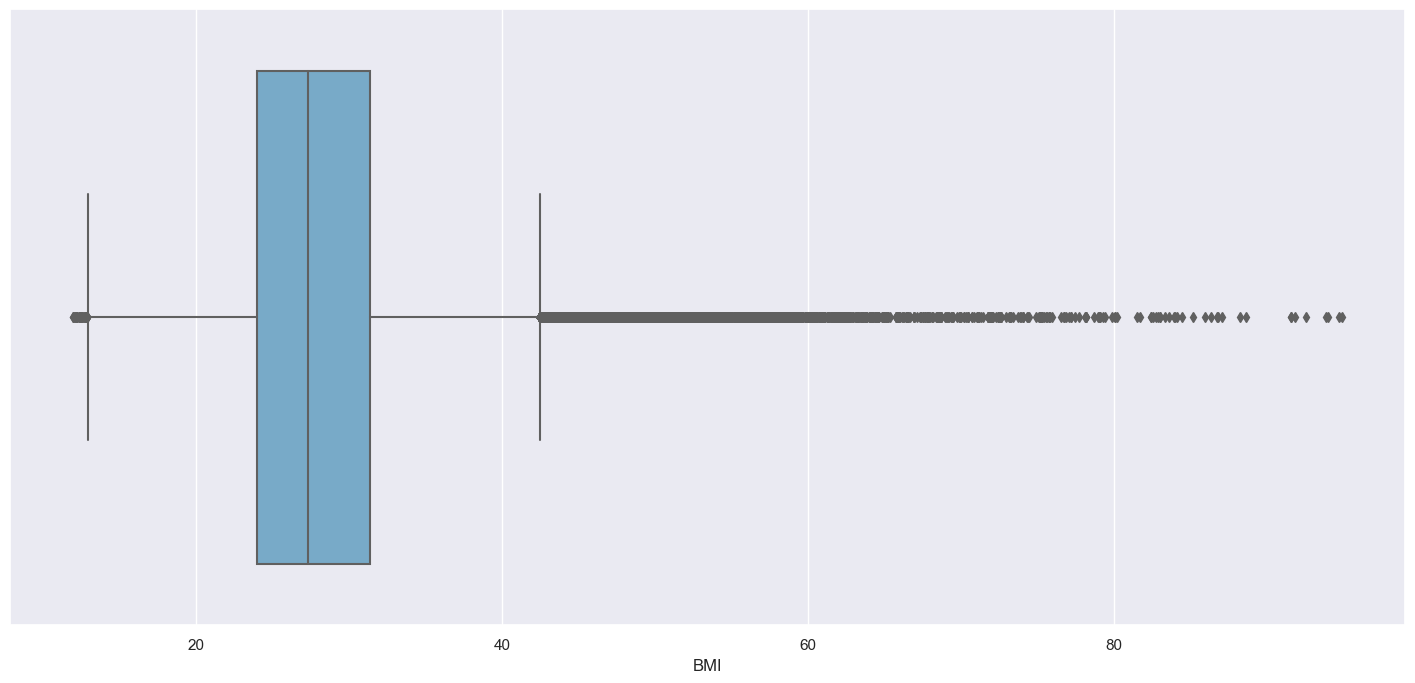

In [32]:
sns.boxplot(data=theheart_copy, x="BMI", hue="HeartDisease", palette="Blues")
plt.show()

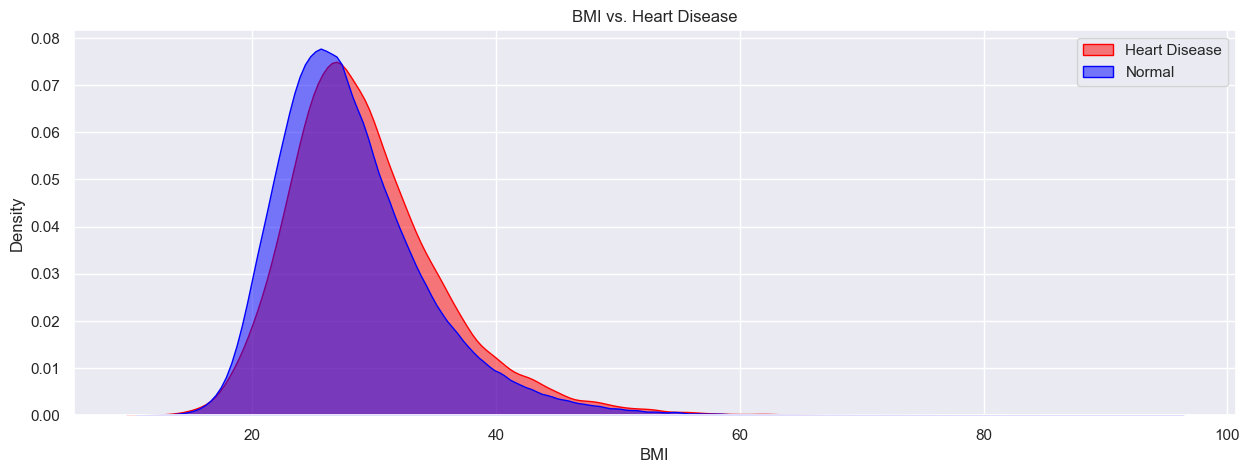

In [33]:
fig, ax = plt.subplots(figsize=(15,5))
sns.kdeplot(theheart_copy[theheart_copy["HeartDisease"]==1]["BMI"], alpha=0.5,fill = True, color="red", ax = ax)
sns.kdeplot(theheart_copy[theheart_copy["HeartDisease"]==0]["BMI"], alpha=0.5,fill = True, color="blue", ax = ax)
#sns.kdeplot(data=theheart_copy, x='BMI', hue='HeartDisease', alpha=0.4, fill = True, ax = ax)
plt.legend(labels=["Heart Disease","Normal"])
plt.title("BMI vs. Heart Disease")
plt.show()

#### While it may seem from the boxplot alone that there are many outliers, plotting the distribution reveals the data is bimodal and slightly skewed to the left. This will shift the median towards the left. In this case, most of the outliers in the boxplot are from the population of people with heart disease (in red). We do not want to remove these, because that would mean losing valuable information about the people with heart disease.

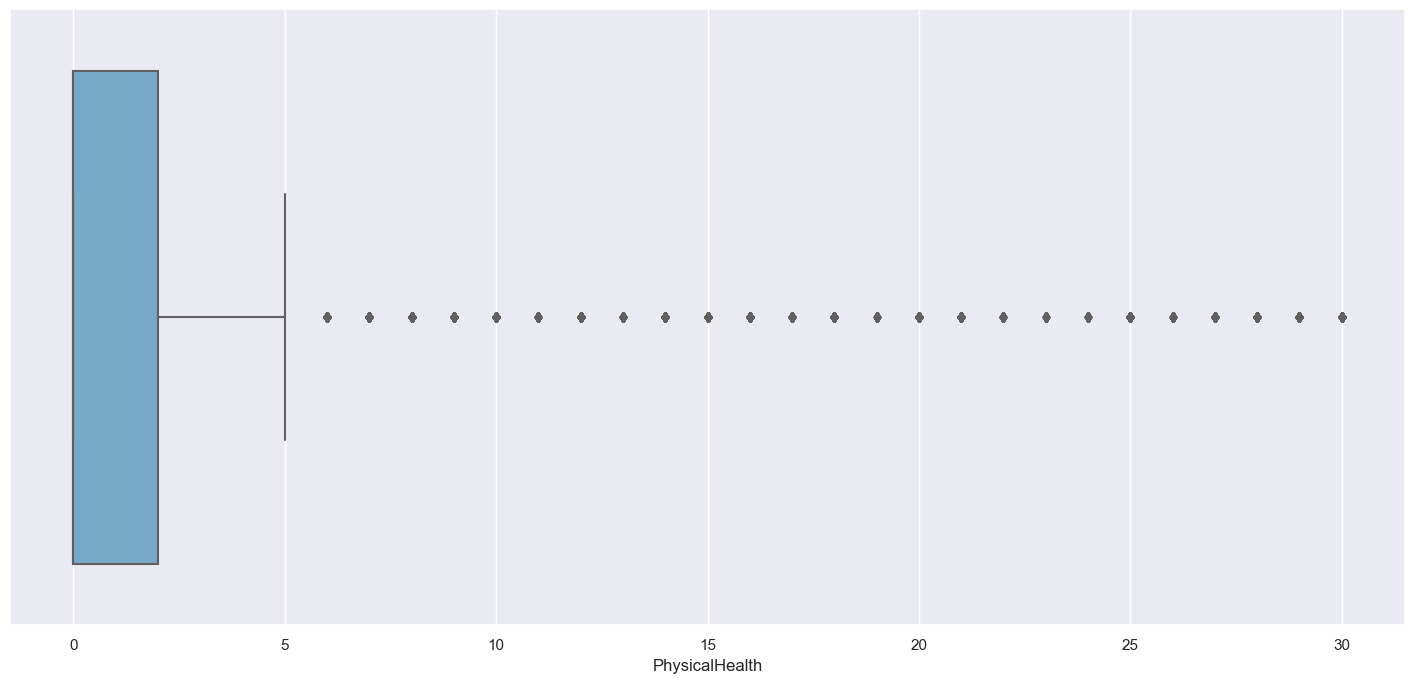

In [34]:
sns.boxplot(data=theheart_copy, x="PhysicalHealth", hue="HeartDisease", palette="Blues")
plt.show()

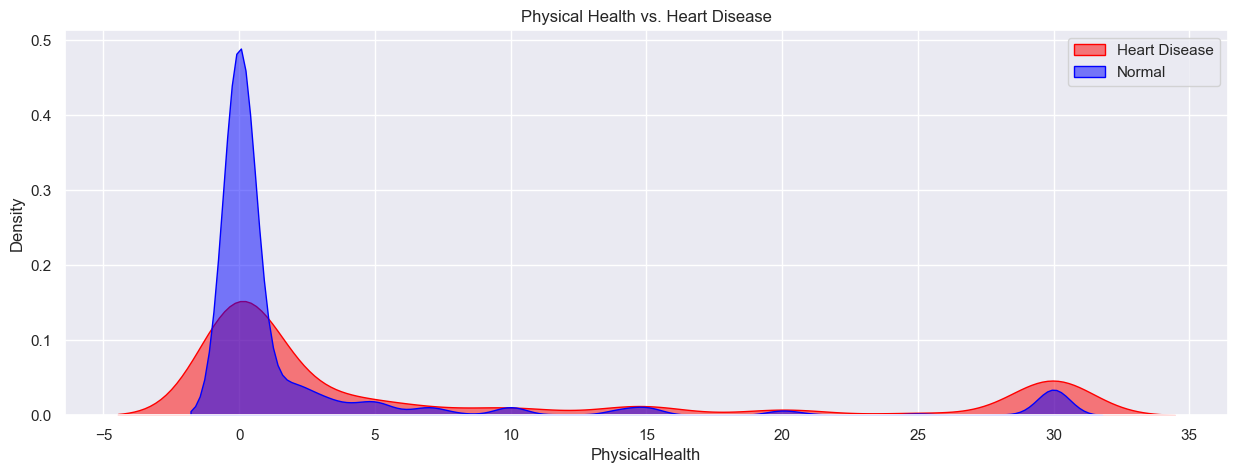

In [35]:
fig, ax = plt.subplots(figsize=(15,5))
sns.kdeplot(theheart_copy[theheart_copy["HeartDisease"]==1]["PhysicalHealth"], alpha=0.5,fill = True, color="red", ax = ax)
sns.kdeplot(theheart_copy[theheart_copy["HeartDisease"]==0]["PhysicalHealth"], alpha=0.5,fill = True, color="blue", ax = ax)
plt.legend(labels=["Heart Disease","Normal"])
plt.title("Physical Health vs. Heart Disease")
plt.show()

#### The Physical Health attribute contains outliers (notably in the 25-30 days range), but it would be harmful to remove them. More people with heart disease have reported feeling physically ill for nearly every day in the month than people with normal hearts. Thus, Physical Health is an important indicator of heart disease.

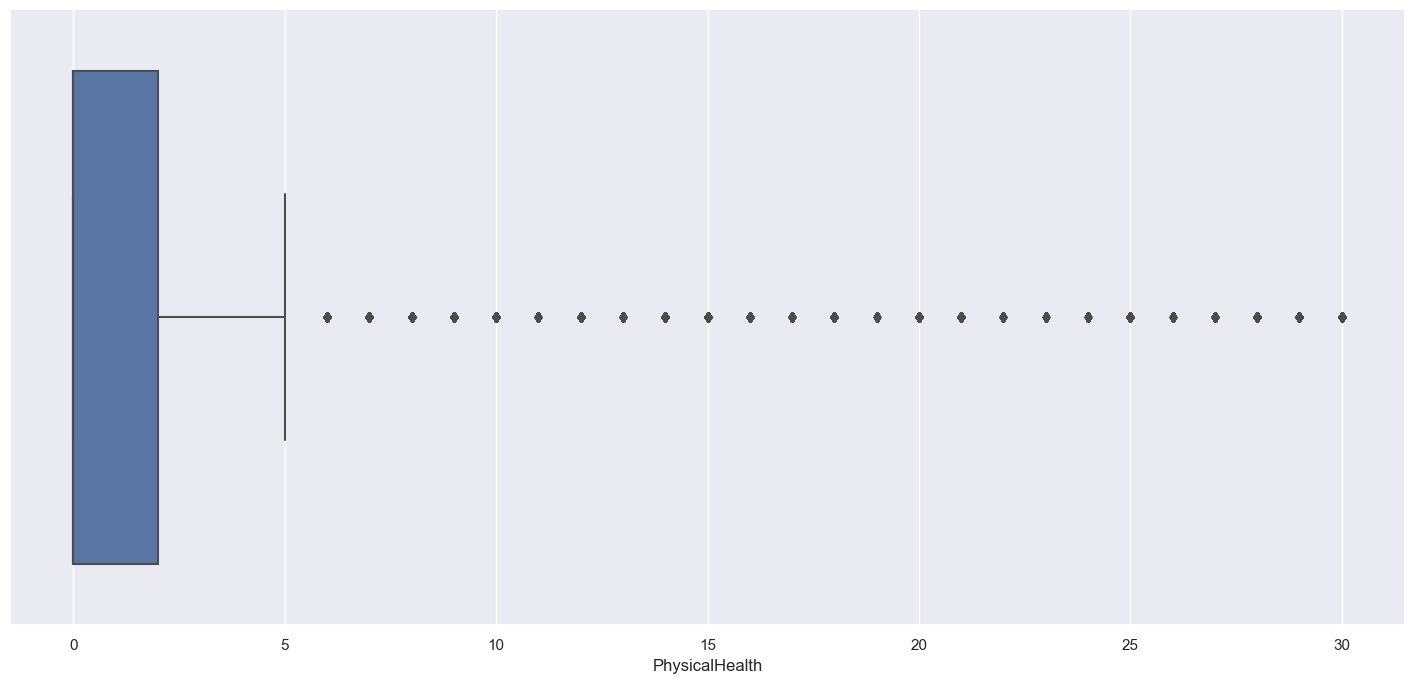

In [36]:
sns.boxplot(data=theheart_copy, x="PhysicalHealth", hue="HeartDisease")
plt.show()

In [37]:
theheart_copy['PhysicalHealth'].value_counts()

0.0     226589
30.0     19509
2.0      14880
1.0      10489
3.0       8617
5.0       7606
10.0      5453
15.0      5012
7.0       4629
4.0       4468
20.0      3216
14.0      2893
6.0       1270
25.0      1164
8.0        924
21.0       626
12.0       605
28.0       446
29.0       204
9.0        180
18.0       167
16.0       135
27.0       124
17.0       110
13.0        91
22.0        89
11.0        85
24.0        67
26.0        66
23.0        46
19.0        35
Name: PhysicalHealth, dtype: int64

In [38]:
# needed for setting custom ticks
xticklabels = np.sort(theheart["AgeCategory"].unique())
print(xticklabels)

['18-24' '25-29' '30-34' '35-39' '40-44' '45-49' '50-54' '55-59' '60-64'
 '65-69' '70-74' '75-79' '80 or older']


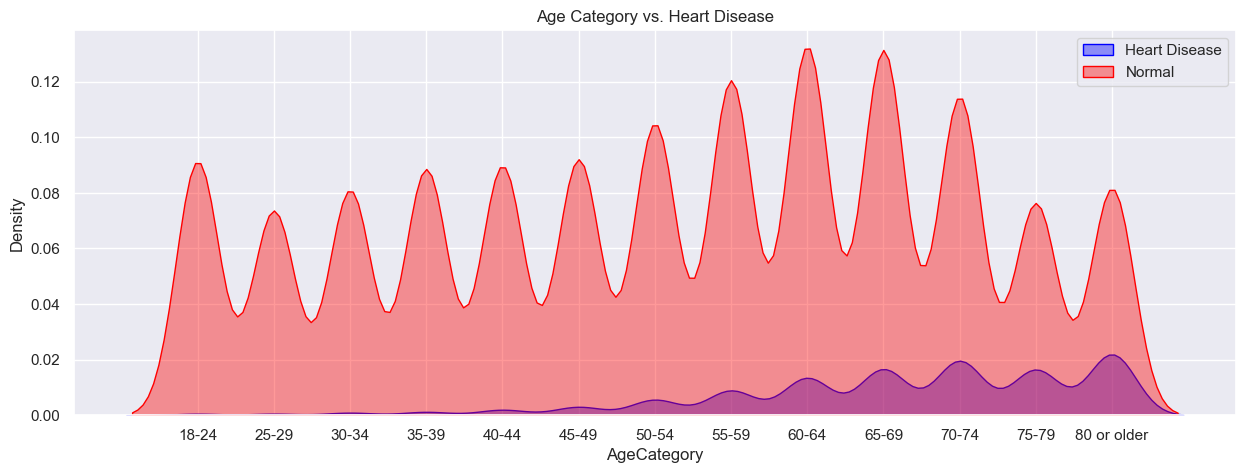

In [39]:
fig, ax = plt.subplots(figsize=(15,5))
sns.kdeplot(data=theheart_copy, x="AgeCategory", hue="HeartDisease", alpha=0.4, fill = True, palette=("red","blue"), ax = ax)
plt.legend(labels=["Heart Disease","Normal"])
plt.xticks(ticks= np.arange(0,13), labels= xticklabels, rotation=0)
plt.title("Age Category vs. Heart Disease")
plt.show()

#### From the Age Category vs. Heart Disease plot, on average, as age increases, the risk of having heart disease increases.

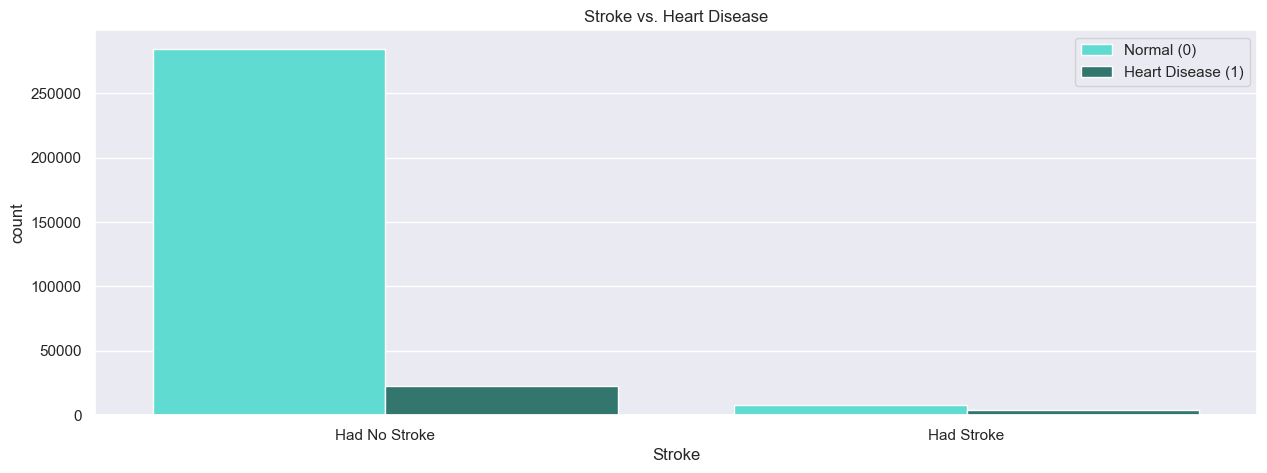

In [40]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(data=theheart_copy, x="Stroke", hue="HeartDisease", palette=("#4CEFE3","#268277"), alpha=1)
plt.legend(labels=["Normal (0)","Heart Disease (1)"])
plt.xticks(ticks= np.arange(0,2), labels=["Had No Stroke","Had Stroke"])
plt.title("Stroke vs. Heart Disease")
plt.show()

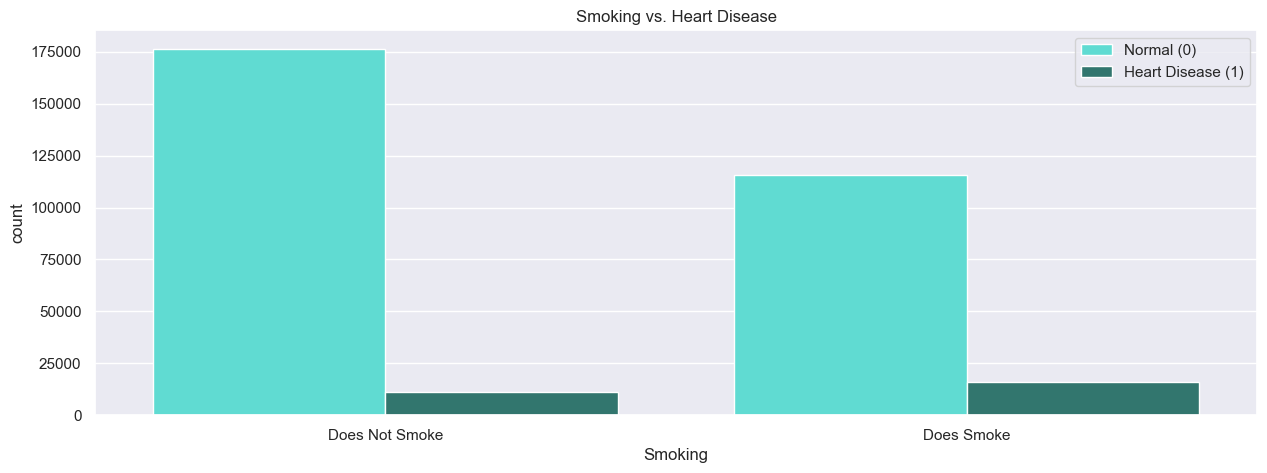

Smoking  HeartDisease
0        0               176551
         1                11336
1        0               115871
         1                16037
dtype: int64

In [41]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(data=theheart_copy, x="Smoking", hue="HeartDisease", palette=("#4CEFE3","#268277"))
plt.legend(labels=["Normal (0)","Heart Disease (1)"])
plt.xticks(ticks=np.arange(0,2), labels=["Does Not Smoke","Does Smoke"])
plt.title("Smoking vs. Heart Disease")
plt.show()

occur = theheart_copy.groupby(['Smoking', 'HeartDisease']).size()
display(occur)

In [42]:
hd_given_smoking = 10316/(96183+10316)
hd_given_notsmoking = 8113/(158037+8113)

print("Percentage of non smokers with heart disease: ", hd_given_notsmoking*100)
print("Percentage of smokers with heart disease: ", hd_given_smoking*100)

Percentage of non smokers with heart disease:  4.882937105025579
Percentage of smokers with heart disease:  9.68647592935145


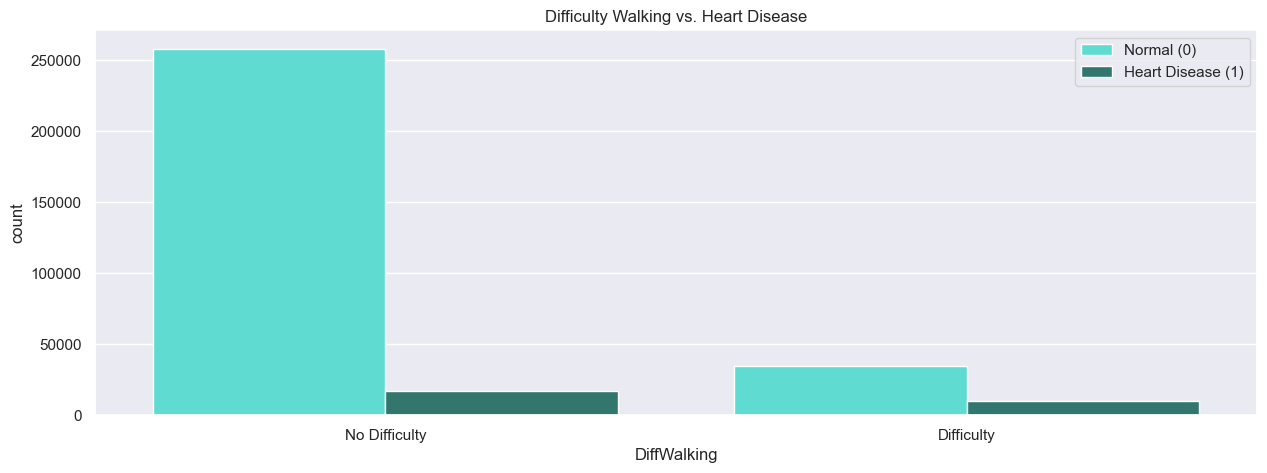

DiffWalking  HeartDisease
0            0               258040
             1                17345
1            0                34382
             1                10028
dtype: int64

In [43]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(data=theheart_copy, x="DiffWalking", hue="HeartDisease", palette=("#4CEFE3","#268277"))
plt.legend(labels=["Normal (0)","Heart Disease (1)"])
plt.xticks(ticks=np.arange(0,2), labels=["No Difficulty","Difficulty"])
plt.title("Difficulty Walking vs. Heart Disease")
plt.show()

occur = theheart_copy.groupby(['DiffWalking', 'HeartDisease']).size()
display(occur)

In [44]:
hd_given_nodiff = 14156/(235801+14156)
hd_give_diff = 4273/(18419+4273)

print("Percentage of no difficulty walking with heart disease: ", hd_given_nodiff*100)
print("Percentage of difficulty walking with heart disease: ", hd_give_diff*100)

Percentage of no difficulty walking with heart disease:  5.663374100345259
Percentage of difficulty walking with heart disease:  18.830424819319582


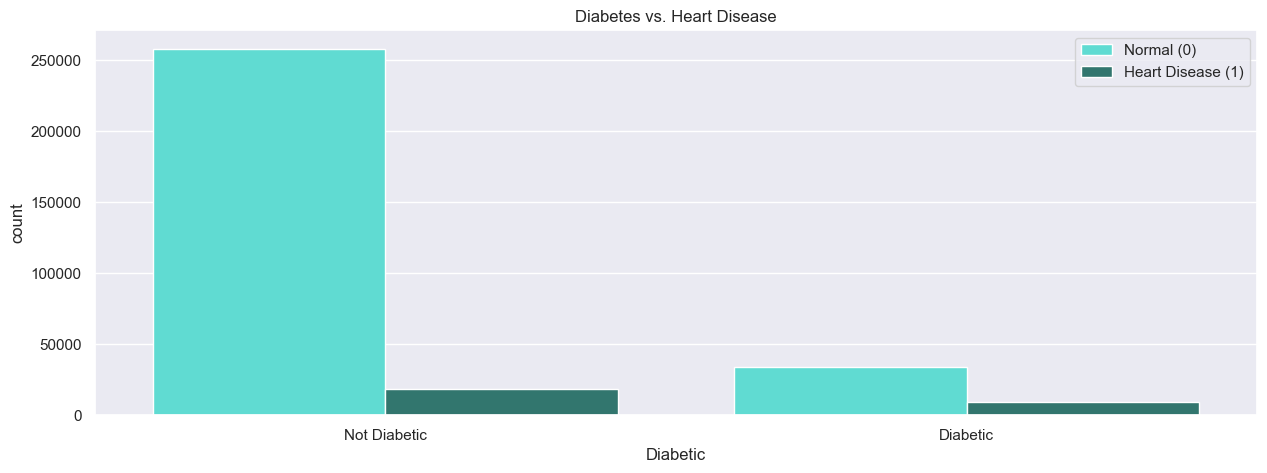

Diabetic  HeartDisease
0         0               258126
          1                18308
1         0                34296
          1                 9065
dtype: int64

In [45]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(data=theheart_copy, x="Diabetic", hue="HeartDisease", palette=("#4CEFE3","#268277"))
plt.legend(labels=["Normal (0)","Heart Disease (1)"])
plt.xticks(ticks=np.arange(0,2), labels=["Not Diabetic","Diabetic"])
plt.title("Diabetes vs. Heart Disease")
plt.show()

occur = theheart_copy.groupby(['Diabetic', 'HeartDisease']).size()
display(occur)

In [46]:
hd_given_nodiabetes = 13114/(228097+13114)
hd_given_diabetes = 5315/(26123+5315)

print("Percentage of no diabetes with heart disease: ", hd_given_nodiabetes*100)
print("Percentage of diabetes walking with heart disease: ", hd_given_diabetes*100)

Percentage of no diabetes with heart disease:  5.436733813963708
Percentage of diabetes walking with heart disease:  16.906291748838985


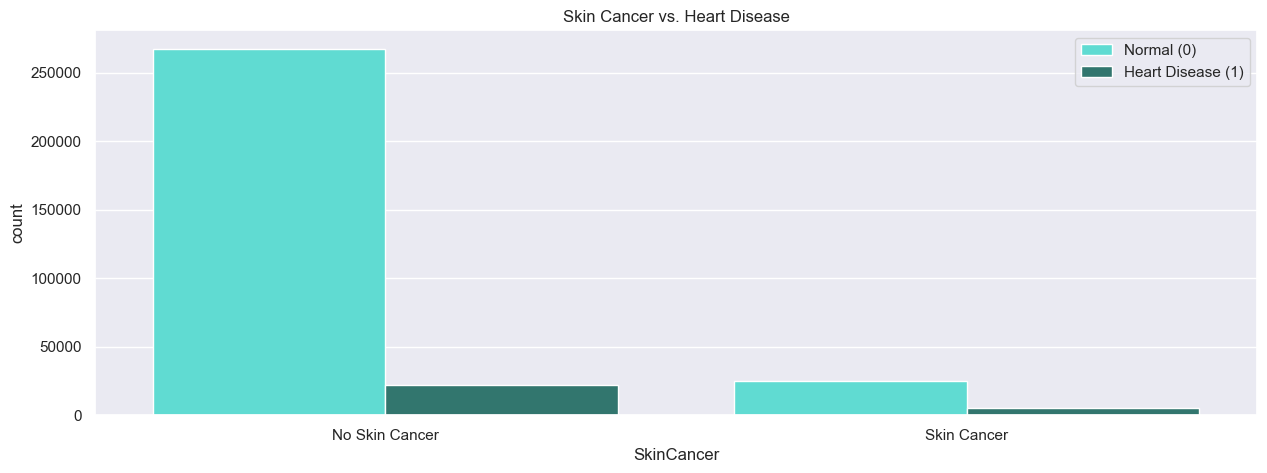

SkinCancer  HeartDisease
0           0               267583
            1                22393
1           0                24839
            1                 4980
dtype: int64

In [47]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(data=theheart_copy, x="SkinCancer", hue="HeartDisease", palette=("#4CEFE3","#268277"))
plt.legend(labels=["Normal (0)","Heart Disease (1)"])
plt.xticks(ticks=np.arange(0,2), labels=["No Skin Cancer","Skin Cancer"])
plt.title("Skin Cancer vs. Heart Disease")
plt.show()

occur = theheart_copy.groupby(['SkinCancer', 'HeartDisease']).size()
display(occur)

In [48]:
hd_given_nocancer = 15027/(233375+15027)
hd_given_cancer = 3402/(20845+3402)

print("Percentage of no skin cancer with heart disease: ", hd_given_nocancer*100)
print("Percentage of skin cancer with heart disease: ", hd_given_cancer*100)

Percentage of no skin cancer with heart disease:  6.049468200739124
Percentage of skin cancer with heart disease:  14.03060172392461


#### Now, Let's fix the balancing issue by oversampling with SMOTE

In [49]:
# oversample with smote
from imblearn.over_sampling import SMOTE

X = theheart_copy.drop('HeartDisease', axis=1)
y = theheart_copy['HeartDisease']

print('HeartDisease before resample:\n', y.value_counts())

X_oversample, y_oversample = SMOTE(random_state=42).fit_resample(X, y)
print('HeartDisease after resample:\n', y_oversample.value_counts())

HeartDisease before resample:
 0    292422
1     27373
Name: HeartDisease, dtype: int64
HeartDisease after resample:
 0    292422
1    292422
Name: HeartDisease, dtype: int64


#### After resampling, there is now an even amount of either outcome values for the target variable

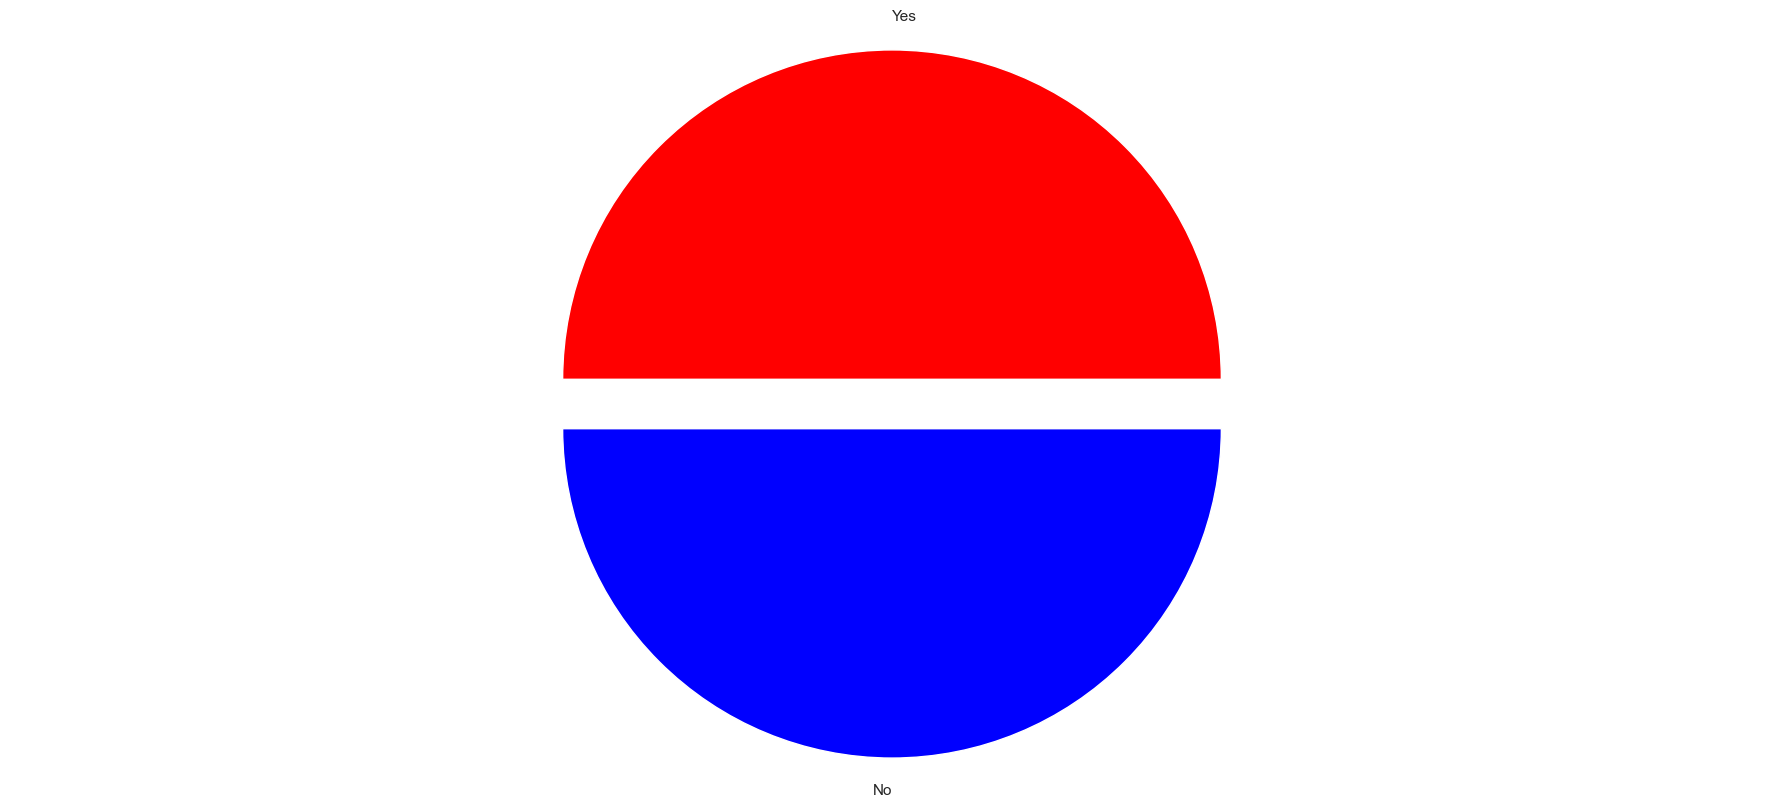

In [50]:
plt.pie(y_oversample.value_counts(), labels=['Yes','No'], colors=['Red','Blue'],
        explode=[0,0.15])
plt.axis('equal')
plt.tight_layout()
plt.show()

## Initial Model Creation and Evaluation

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_oversample, y_oversample, test_size=0.3)

In [52]:
# CROSS VALIDATION LOGISTIC REGRESSION

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import validation_curve

logmodel = LogisticRegression(max_iter=1000)
seed=7
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
scoring = 'accuracy'
results = model_selection.cross_val_score(logmodel, X_oversample, y_oversample, cv=kfold, scoring=scoring)

print("Accuracy of how well logreg model can predict: %.3f (%.3f)" % (np.mean(results), np.std(results)))

Accuracy of how well logreg model can predict: 0.736 (0.002)


In [53]:
# logreg model evaluation
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.75      0.71      0.73     87920
           1       0.72      0.77      0.74     87534

    accuracy                           0.74    175454
   macro avg       0.74      0.74      0.74    175454
weighted avg       0.74      0.74      0.74    175454

Accuracy Score: 0.7367173162196359


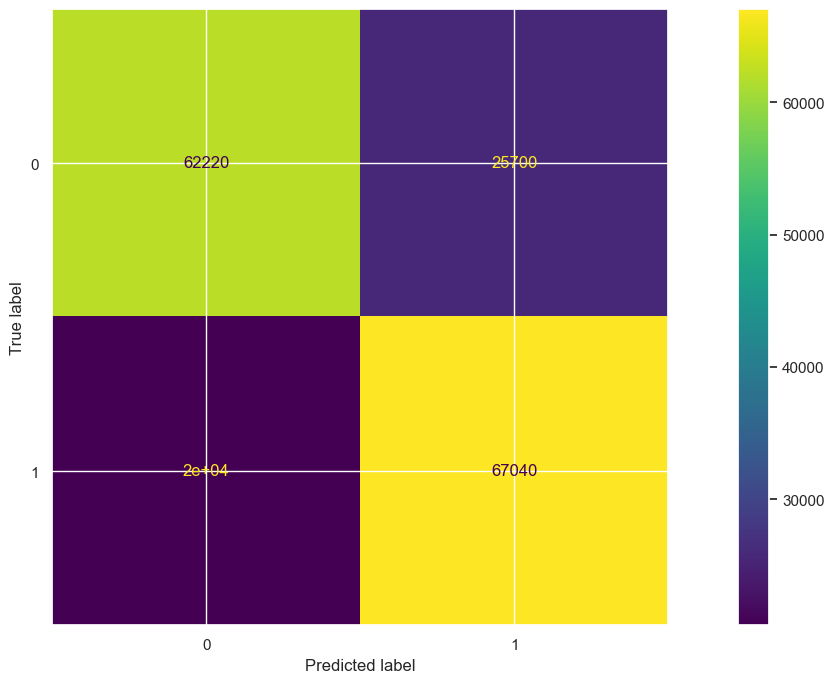

In [54]:
# LOGREG RESULTS

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, predictions)

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

print(classification_report(y_test, predictions))
disp.plot()
print("Accuracy Score:", acc)

## Model Creation and Evaluation Using Standardization Techniques

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_oversample, y_oversample, test_size=0.3)

In [56]:
# standardization
from sklearn.preprocessing import StandardScaler

# create scaler object, normalize to value between 0 and 1
scaler = StandardScaler()

#using fit_transform() on training 
#the "fit" part of the method is calculating the mean and variance
#the "transform" part of the method is transforming the features using respective mean and variance
X_train = scaler.fit_transform(X_train) 

#using transform() on test
# we can use the parameters learned by the model from the training data to transform test data
# this will create a new mean and variance which is not what we want
X_test = scaler.transform(X_test)

In [57]:
logmodel_std = LogisticRegression(max_iter=1000)
seed=7
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
scoring = 'accuracy'
results_acc = model_selection.cross_val_score(logmodel_std, X, y, cv=kfold, scoring=scoring)

In [58]:
print("Accuracy of how well logred model can predict: {:.3f} ({:.3f})".format(results.mean(), results.std()))

Accuracy of how well logred model can predict: 0.736 (0.002)


In [59]:
logmodel_std.fit(X_train, y_train)
predictions_std = logmodel.predict(X_test)

c:\Users\sguti\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.00      0.00     87653
           1       0.50      1.00      0.67     87801

    accuracy                           0.50    175454
   macro avg       0.75      0.50      0.33    175454
weighted avg       0.75      0.50      0.33    175454

Accuracy Score: 0.5005984474563133
Accuracy of logistic regression classifier on train set: 0.737
Accuracy of logistic regression classifier on test set: 0.736


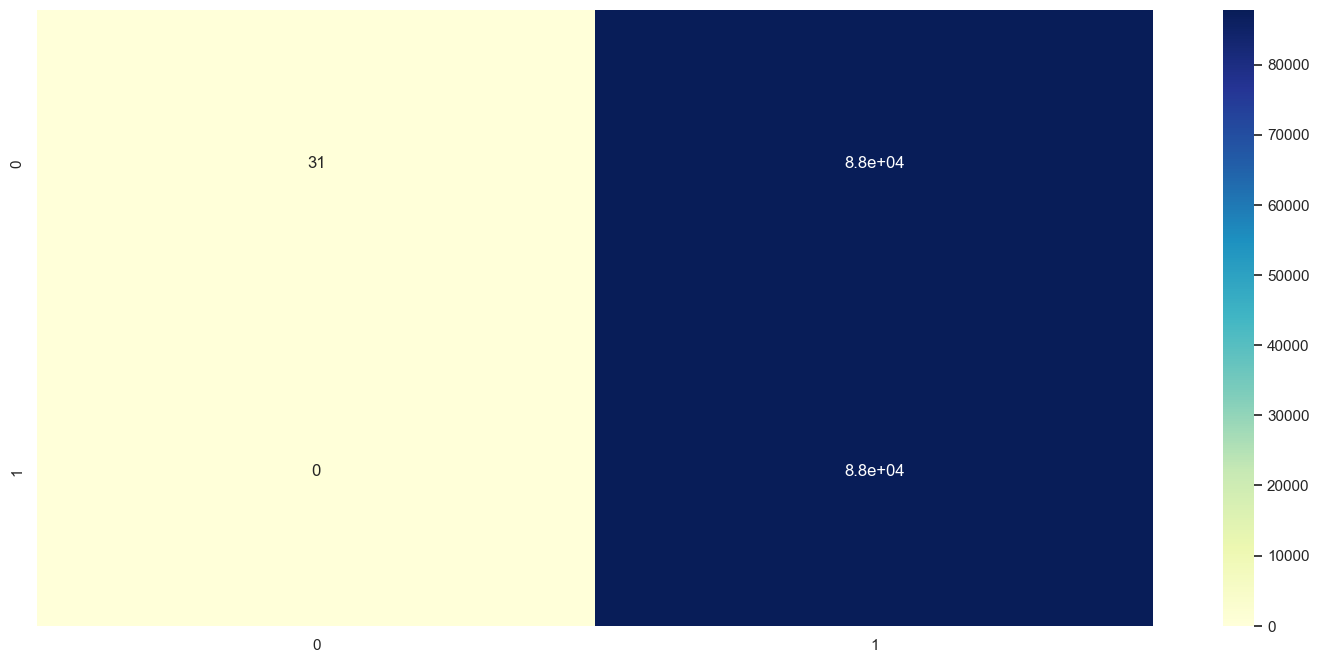

In [60]:
acc_std = accuracy_score(y_test, predictions_std)
cm_std = confusion_matrix(y_test, predictions_std)

print(classification_report(y_test, predictions_std))
print("Accuracy Score:", acc_std)
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(logmodel_std.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logmodel_std.score(X_test, y_test)))

sns.heatmap(cm_std, annot=True, cmap='YlGnBu')
plt.show()

## Model Creation and Evaluation Using Normalization Techniques

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_oversample, y_oversample, test_size=0.3)

In [62]:
# normalization
from sklearn.preprocessing import MinMaxScaler

# create scaler object, normalize to value between [0,1]
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train) 

X_test = scaler.transform(X_test)

In [63]:
logmodel_minmax = LogisticRegression(max_iter=1000)
seed=7
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
scoring = 'accuracy'
results_acc = model_selection.cross_val_score(logmodel_minmax, X, y, cv=kfold, scoring=scoring)

In [64]:
print("Accuracy of how well logred model can predict: {:.3f} ({:.3f})".format(results.mean(), results.std()))

Accuracy of how well logred model can predict: 0.736 (0.002)


In [65]:
logmodel_minmax.fit(X_train, y_train)
predictions_minmax = logmodel_minmax.predict(X_test)

              precision    recall  f1-score   support

           0       0.75      0.70      0.73     87593
           1       0.72      0.77      0.75     87861

    accuracy                           0.74    175454
   macro avg       0.74      0.74      0.74    175454
weighted avg       0.74      0.74      0.74    175454

Accuracy Score: 0.7368598037092343
Accuracy of logistic regression classifier on train set: 0.736
Accuracy of logistic regression classifier on test set: 0.737


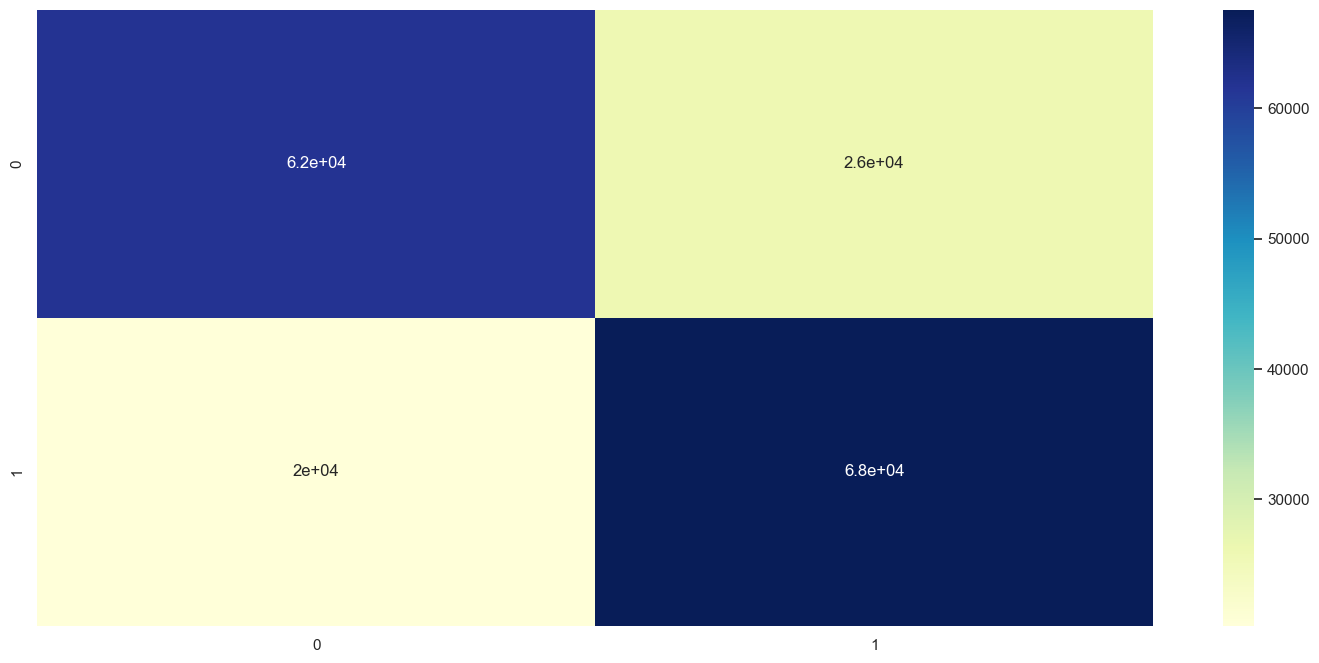

In [66]:
acc_minmax = accuracy_score(y_test, predictions_minmax)
cm_minmax = confusion_matrix(y_test, predictions_minmax)

print(classification_report(y_test, predictions_minmax))
print("Accuracy Score:", acc_minmax)
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(logmodel_minmax.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logmodel_minmax.score(X_test, y_test)))

sns.heatmap(cm_minmax, annot=True, cmap='YlGnBu')
plt.show()

### Results
While running different feature scaling techniques, they both averaged at around a test accuracy of 0.730. Thus, either method is suitable for this task. However, although they performed the same, there are key differences between the two that are worth weighing before moving on. Standardization scales the data using the mean and variance so that the data is centered at mean 0 with variance 1. This allows the data to not be constrained to a particular range. Normalization scales the data using the minimum and maximum values so that the range is constrained between [0,1]. However, outliers can have an affect on the normalization if the outliers happens to be a minimum or maximum. For this reason, we will use the standardized model moving forward.

### Plotting the ROC-AUC Curve

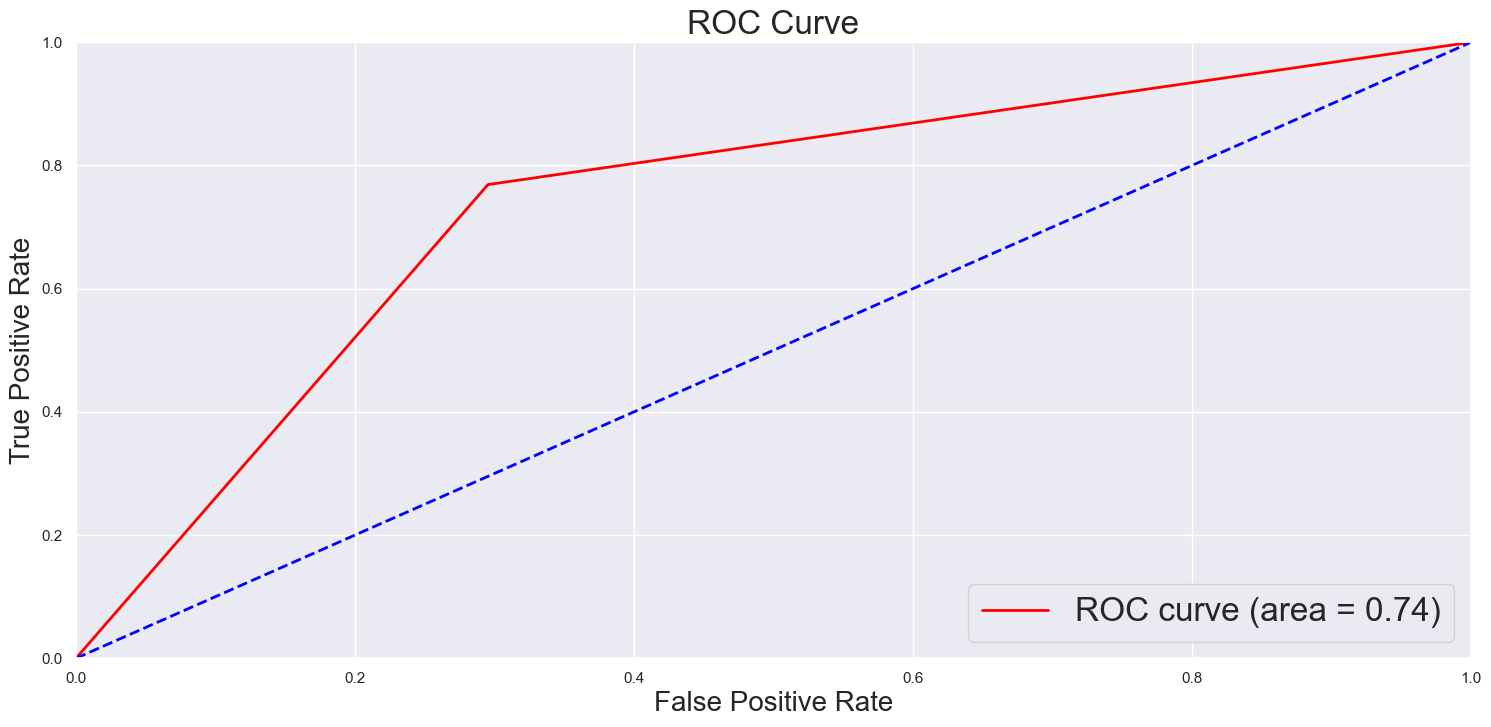

In [67]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions_minmax)
roc_auc = metrics.auc(fpr,tpr)

plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0,1],[0,1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize='20')
plt.ylabel('True Positive Rate', fontsize='20')
plt.title('ROC Curve', fontsize='24')
plt.legend(loc="lower right", fontsize='24')

plt.show()

### Finding the Log-Loss

In [68]:
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
model = LogisticRegression()
scoring = 'neg_log_loss'
results_logl = model_selection.cross_val_score(logmodel_minmax, X, y, cv=kfold,
scoring=scoring)

In [69]:
print("LogLoss: {:.3f} ({:.3f})".format(results_logl.mean(), results_logl.std()))

LogLoss: -0.234 (0.004)


# Naive Bayes

In [70]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=3,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)

gs_NB.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'var_smoothing': 0.08111308307896872}

In [71]:
# instantiate the model to train a Gaussian Naive Bayes classifier
gnb = GaussianNB(var_smoothing=0.08111308307896872)

# fit the model
gnb.fit(X_train, y_train)

GaussianNB(var_smoothing=0.08111308307896872)

In [72]:
y_pred = gnb.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.6774


In [74]:
y_pred_train = gnb.predict(X_train)

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.6778
Test set score: 0.6774


In [75]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.80      0.71     87593
           1       0.73      0.56      0.63     87861

    accuracy                           0.68    175454
   macro avg       0.69      0.68      0.67    175454
weighted avg       0.69      0.68      0.67    175454



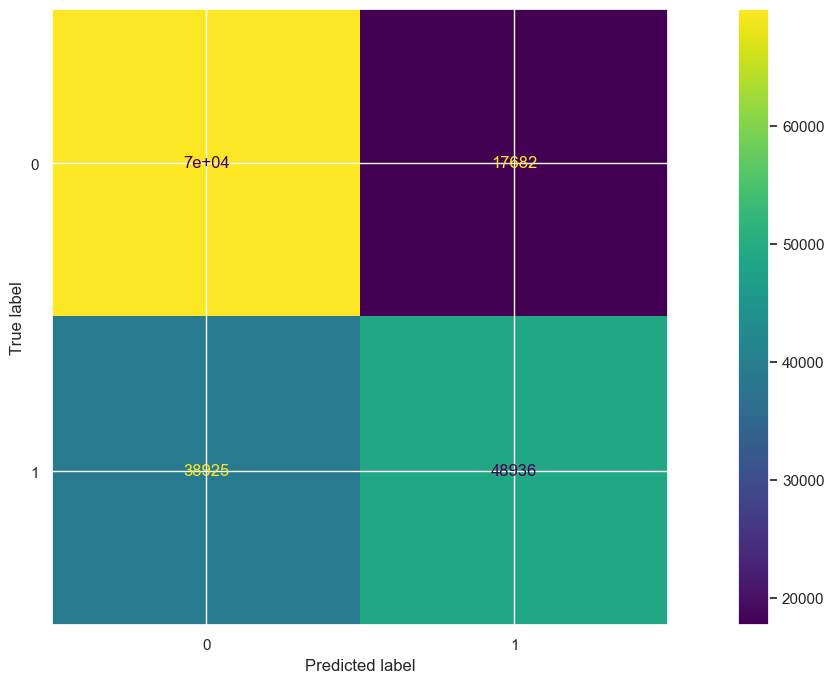

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### Results
While running different feature scaling techniques, they both averaged at around a test accuracy of 0.730. Thus, either method is suitable for this task. However, although they performed the same, there are key differences between the two that are worth weighing before moving on. Standardization scales the data using the mean and variance so that the data is centered at mean 0 with variance 1. This allows the data to not be constrained to a particular range. Normalization scales the data using the minimum and maximum values so that the range is constrained between [0,1]. However, outliers can have an affect on the normalization if the outliers happens to be a minimum or maximum. For this reason, we will use the standardized model moving forward.

### Plotting the ROC-AUC Curve

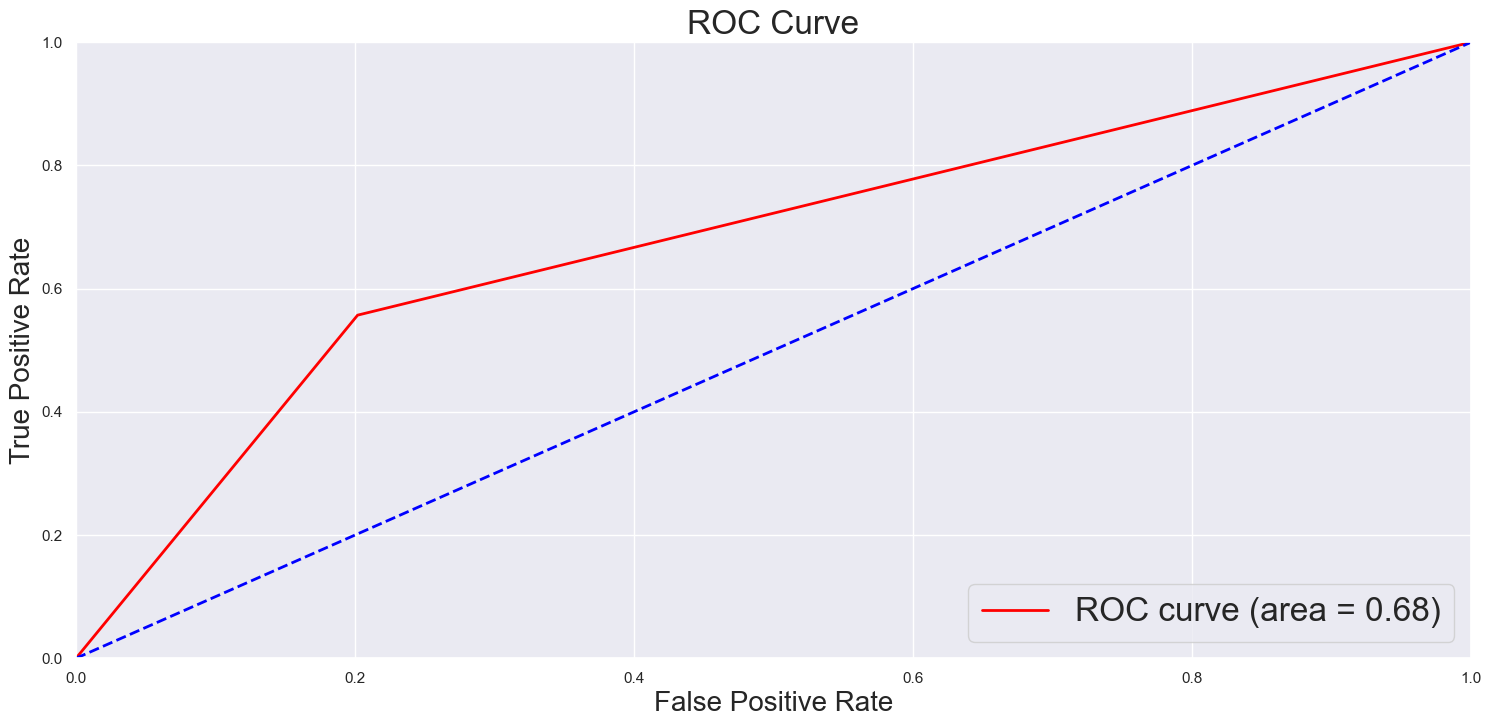

In [77]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr,tpr)

plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0,1],[0,1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize='20')
plt.ylabel('True Positive Rate', fontsize='20')
plt.title('ROC Curve', fontsize='24')
plt.legend(loc="lower right", fontsize='24')

plt.show()

### Finding the Log-Loss

In [78]:
from sklearn import model_selection
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
model = GaussianNB()
scoring = 'neg_log_loss'
results_logl = model_selection.cross_val_score(gnb, X, y, cv=kfold,
scoring=scoring)

In [79]:
print("LogLoss: {:.3f} ({:.3f})".format(results_logl.mean(), results_logl.std()))

LogLoss: -0.313 (0.003)


# Random Forest

In [80]:
# GridSearch for Random Forest modeling
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [81]:
rfc = RandomForestClassifier(random_state=42)

In [82]:
params = { 
    'n_estimators': [325, 350],
    'max_depth' : [30,35],
    'min_samples_split': [5,10]
}

In [83]:
#gridSearchRFC = GridSearchCV(estimator=rfc, param_grid=params, cv= 3, verbose=3)
#gridSearchRFC.fit(X_train, y_train)

In [84]:
#gridSearchRFC.best_params_

In [85]:
# After the Grid Search ran for over an hour, I decided to stop it and use the best parameters provided when it was displayed using verbose
par = {'max_depth': 25, 'min_samples_split': 5, 'n_estimators': 325}
rfc1 = RandomForestClassifier(random_state=42, **par)

In [86]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_split=5, n_estimators=325,
                       random_state=42)

In [87]:
prediction = rfc1.predict(X_test)

In [88]:
print("Accuracy for Random Forest model: ", accuracy_score(y_test, prediction))

Accuracy for Random Forest model:  0.8389036442600339


              precision    recall  f1-score   support

           0       0.85      0.82      0.84     87593
           1       0.83      0.86      0.84     87861

    accuracy                           0.84    175454
   macro avg       0.84      0.84      0.84    175454
weighted avg       0.84      0.84      0.84    175454

Accuracy Score: 0.8389036442600339
Accuracy of random forest classifier on train set: 0.919
Accuracy of random forest classifier on test set: 0.839


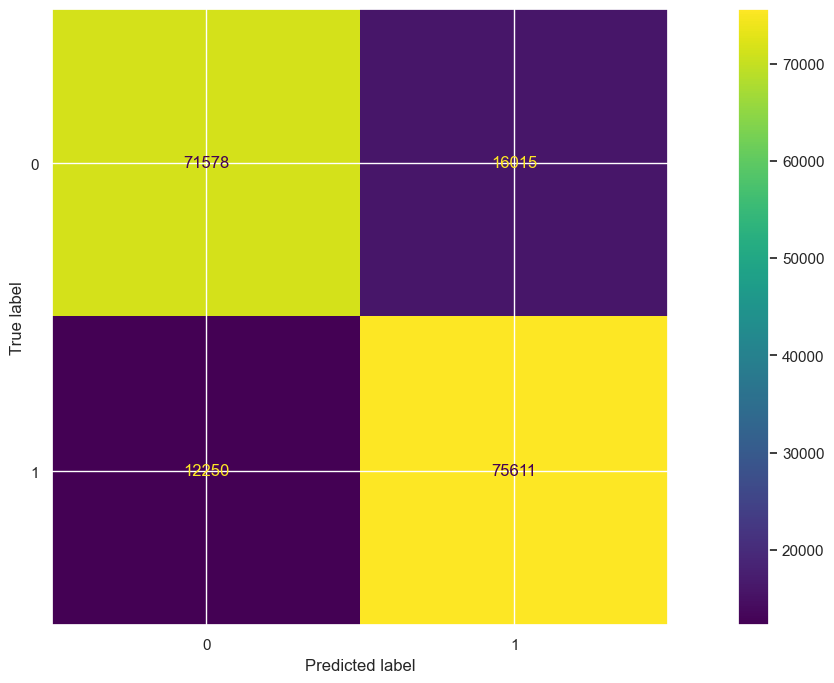

In [89]:
acc = accuracy_score(y_test, prediction)
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

print(classification_report(y_test, prediction))
disp.plot()
print("Accuracy Score:", acc)
print('Accuracy of random forest classifier on train set: {:.3f}'.format(rfc1.score(X_train, y_train)))
print('Accuracy of random forest classifier on test set: {:.3f}'.format(rfc1.score(X_test, y_test)))

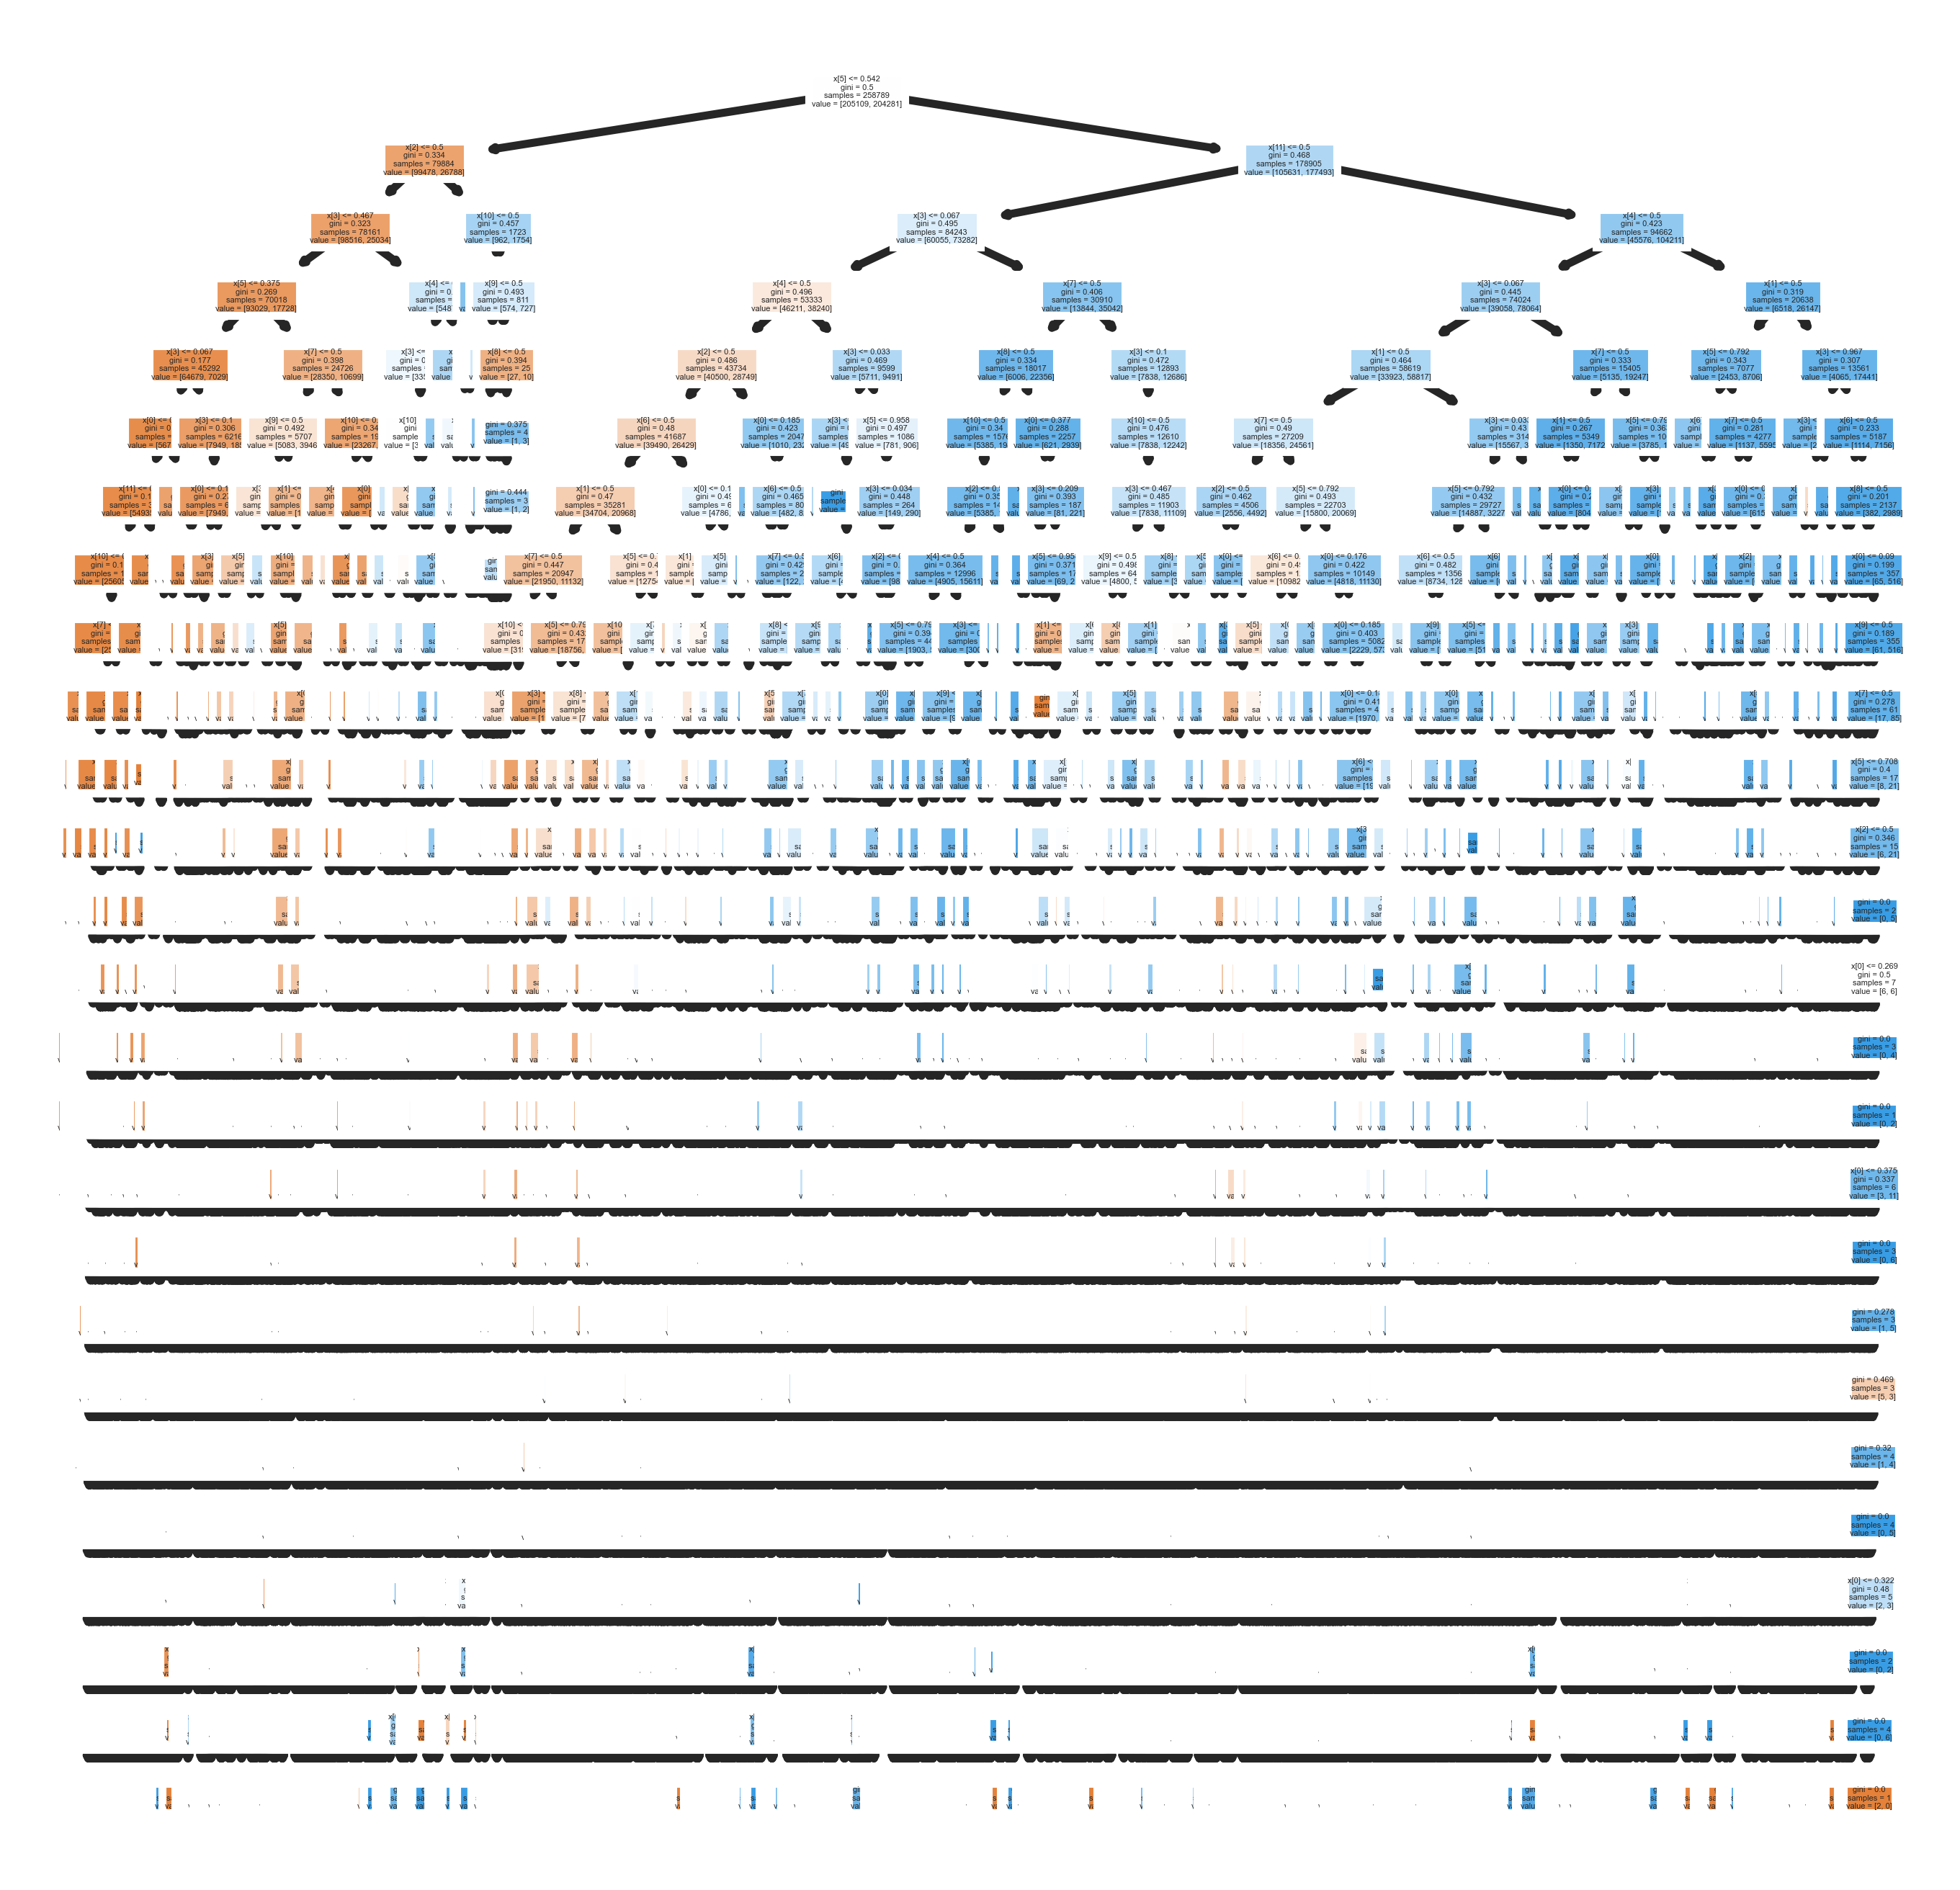

In [90]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rfc1.estimators_[1],
               filled = True);
fig.savefig('rf_individualtree.png')

# SVC

In [91]:
from sklearn.svm import SVC
model = SVC(C=10, gamma=1, kernel='linear')
model.fit(X_train,y_train)

SVC(C=10, gamma=1, kernel='linear')

In [92]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72     87593
           1       0.71      0.80      0.75     87861

    accuracy                           0.74    175454
   macro avg       0.74      0.74      0.74    175454
weighted avg       0.74      0.74      0.74    175454



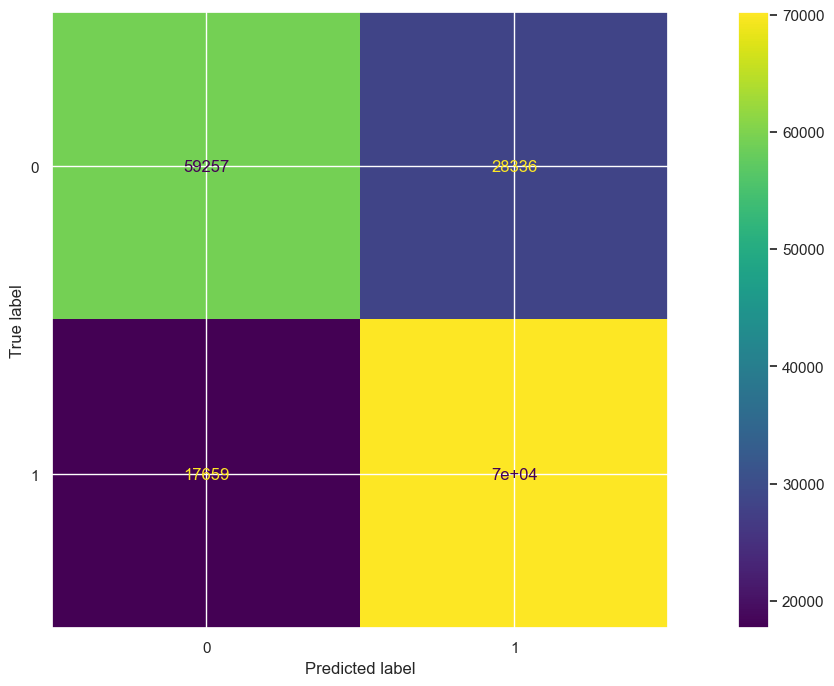

In [93]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### What we have learned
* Random Forest performed the best out of all the models (84% accuracy)
* All of our models performed adequately (greater than 70% accuracy)

### Research Questions

***Are these variables contributing factors to heart disease?***
* Based off our multiple models, we can conclude that the features of this dataset do contribute to a heightened risk for heart disease

***What kind of patterns can we find from this data?***
* Respondents with other diseases (skin cancer, kidney disease, diabetes) and also having heart disease represented a larger percentage of total respondents with said diseases than without the other diseases
* Any combination of what may be considered unhealthy lifestyle choices and/or pre-existing conditions can suggest a greater risk for heart disease

***Can we identify variables that are stand-out key factors to heart disease?***
* Smoking
* Age
* BMI
* Kidney Disease
* Diabetes
* Skin Cancer
* Difficulty walking
* Stroke

### Conclusion
* While some factors that may raise the risk of heart disease are out of our control, like diseases or age (including the physical limitations that come with aging), there are ways to reduce one’s risk for heart disease.
* We have found that of the variables we can control, smoking habits, exercising, and one’s diet prove to be the most effective in reducing heart problems


